<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Human Bone Fractures Detection</h2>

## Step # 01 Install the Ultralytics Package

In [ ]:
!nvidia-smi

Sun May 11 01:43:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install -U albumentations

In [ ]:
# Install necessary libraries (only once per session)
!pip install -q ultralytics supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.2 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


In [ ]:
import torch
torch.cuda.empty_cache()
print(torch.cuda.is_available())

True


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Train YOLOv11 Model</h2>

In [ ]:
import zipfile

zip_file = "/content/archive (2).zip"  # your uploaded file

# Extract into a new folder
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("/content/fracture_data")  # ✅ This is a folder

# List contents to verify
import os
os.listdir("/content/fracture_data")


['Human Bone Fractures Multi-modal Image Dataset (HBFMID)']

In [ ]:
!yolo task=detect \
  mode=train \
  model=yolov8n.yaml \
  data="/content/fracture_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/data.yaml" \
  epochs=100 \
  imgsz=640 \
  batch=16 \
  device=0 \
  patience=20

Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fracture_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto

## Visualization of Labels

Visualizing 9 training images


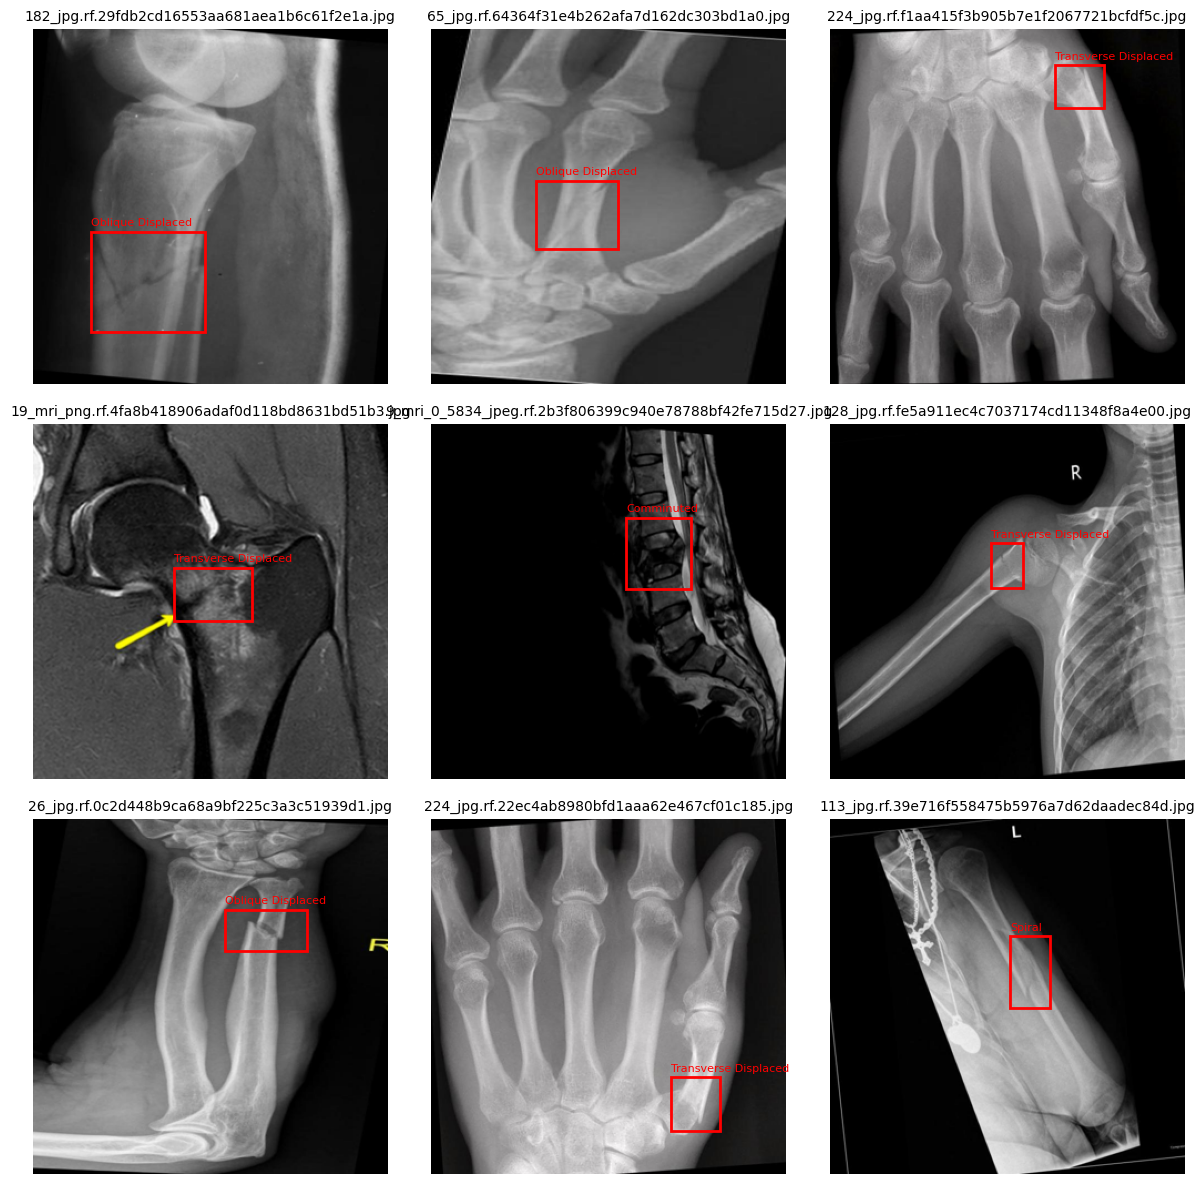

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pathlib
import math

# Path setup
train_images_dir = pathlib.Path("/content/fracture_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/images")
train_labels_dir = pathlib.Path("/content/fracture_data/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/labels")
train_images = list(train_images_dir.glob("*.jpg"))

# Limit number of images to speed up
max_images = 9
train_images = train_images[:max_images]

# Class names
class_names = ['Comminuted', 'Greenstick', 'Healthy', 'Linear', 'Oblique Displaced',
               'Oblique', 'Segmental', 'Spiral', 'Transverse Displaced', 'Transverse']

n = len(train_images)
print(f"Visualizing {n} training images")

if n == 0:
    print("No images found in the directory. Please check the path.")
else:
    cols = 3
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
    axes = axes.flatten()

    for i in range(n):
        img = Image.open(train_images[i]).resize((320, 320))
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(train_images[i].name, fontsize=10)

          # Bounding Box Drawing
        label_path = train_labels_dir / f"{train_images[i].stem}.txt"
        img_width, img_height = img.size

        if label_path.exists():
            with open(label_path, "r") as f:
                lines = f.readlines()

            for line in lines:
                values = line.strip().split()
                class_id = int(values[0])
                x_center, y_center, width, height = map(float, values[1:])
                x1 = int((x_center - width / 2) * img_width)
                y1 = int((y_center - height / 2) * img_height)
                box_width = int(width * img_width)
                box_height = int(height * img_height)

                rect = patches.Rectangle((x1, y1), box_width, box_height, linewidth=2, edgecolor="red", facecolor="none")
                axes[i].add_patch(rect)
                axes[i].text(x1, y1 - 5, class_names[class_id], color="red", fontsize=8)

    # Remove extra axes
    for j in range(n, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [1]:
from IPython.display import Image, display

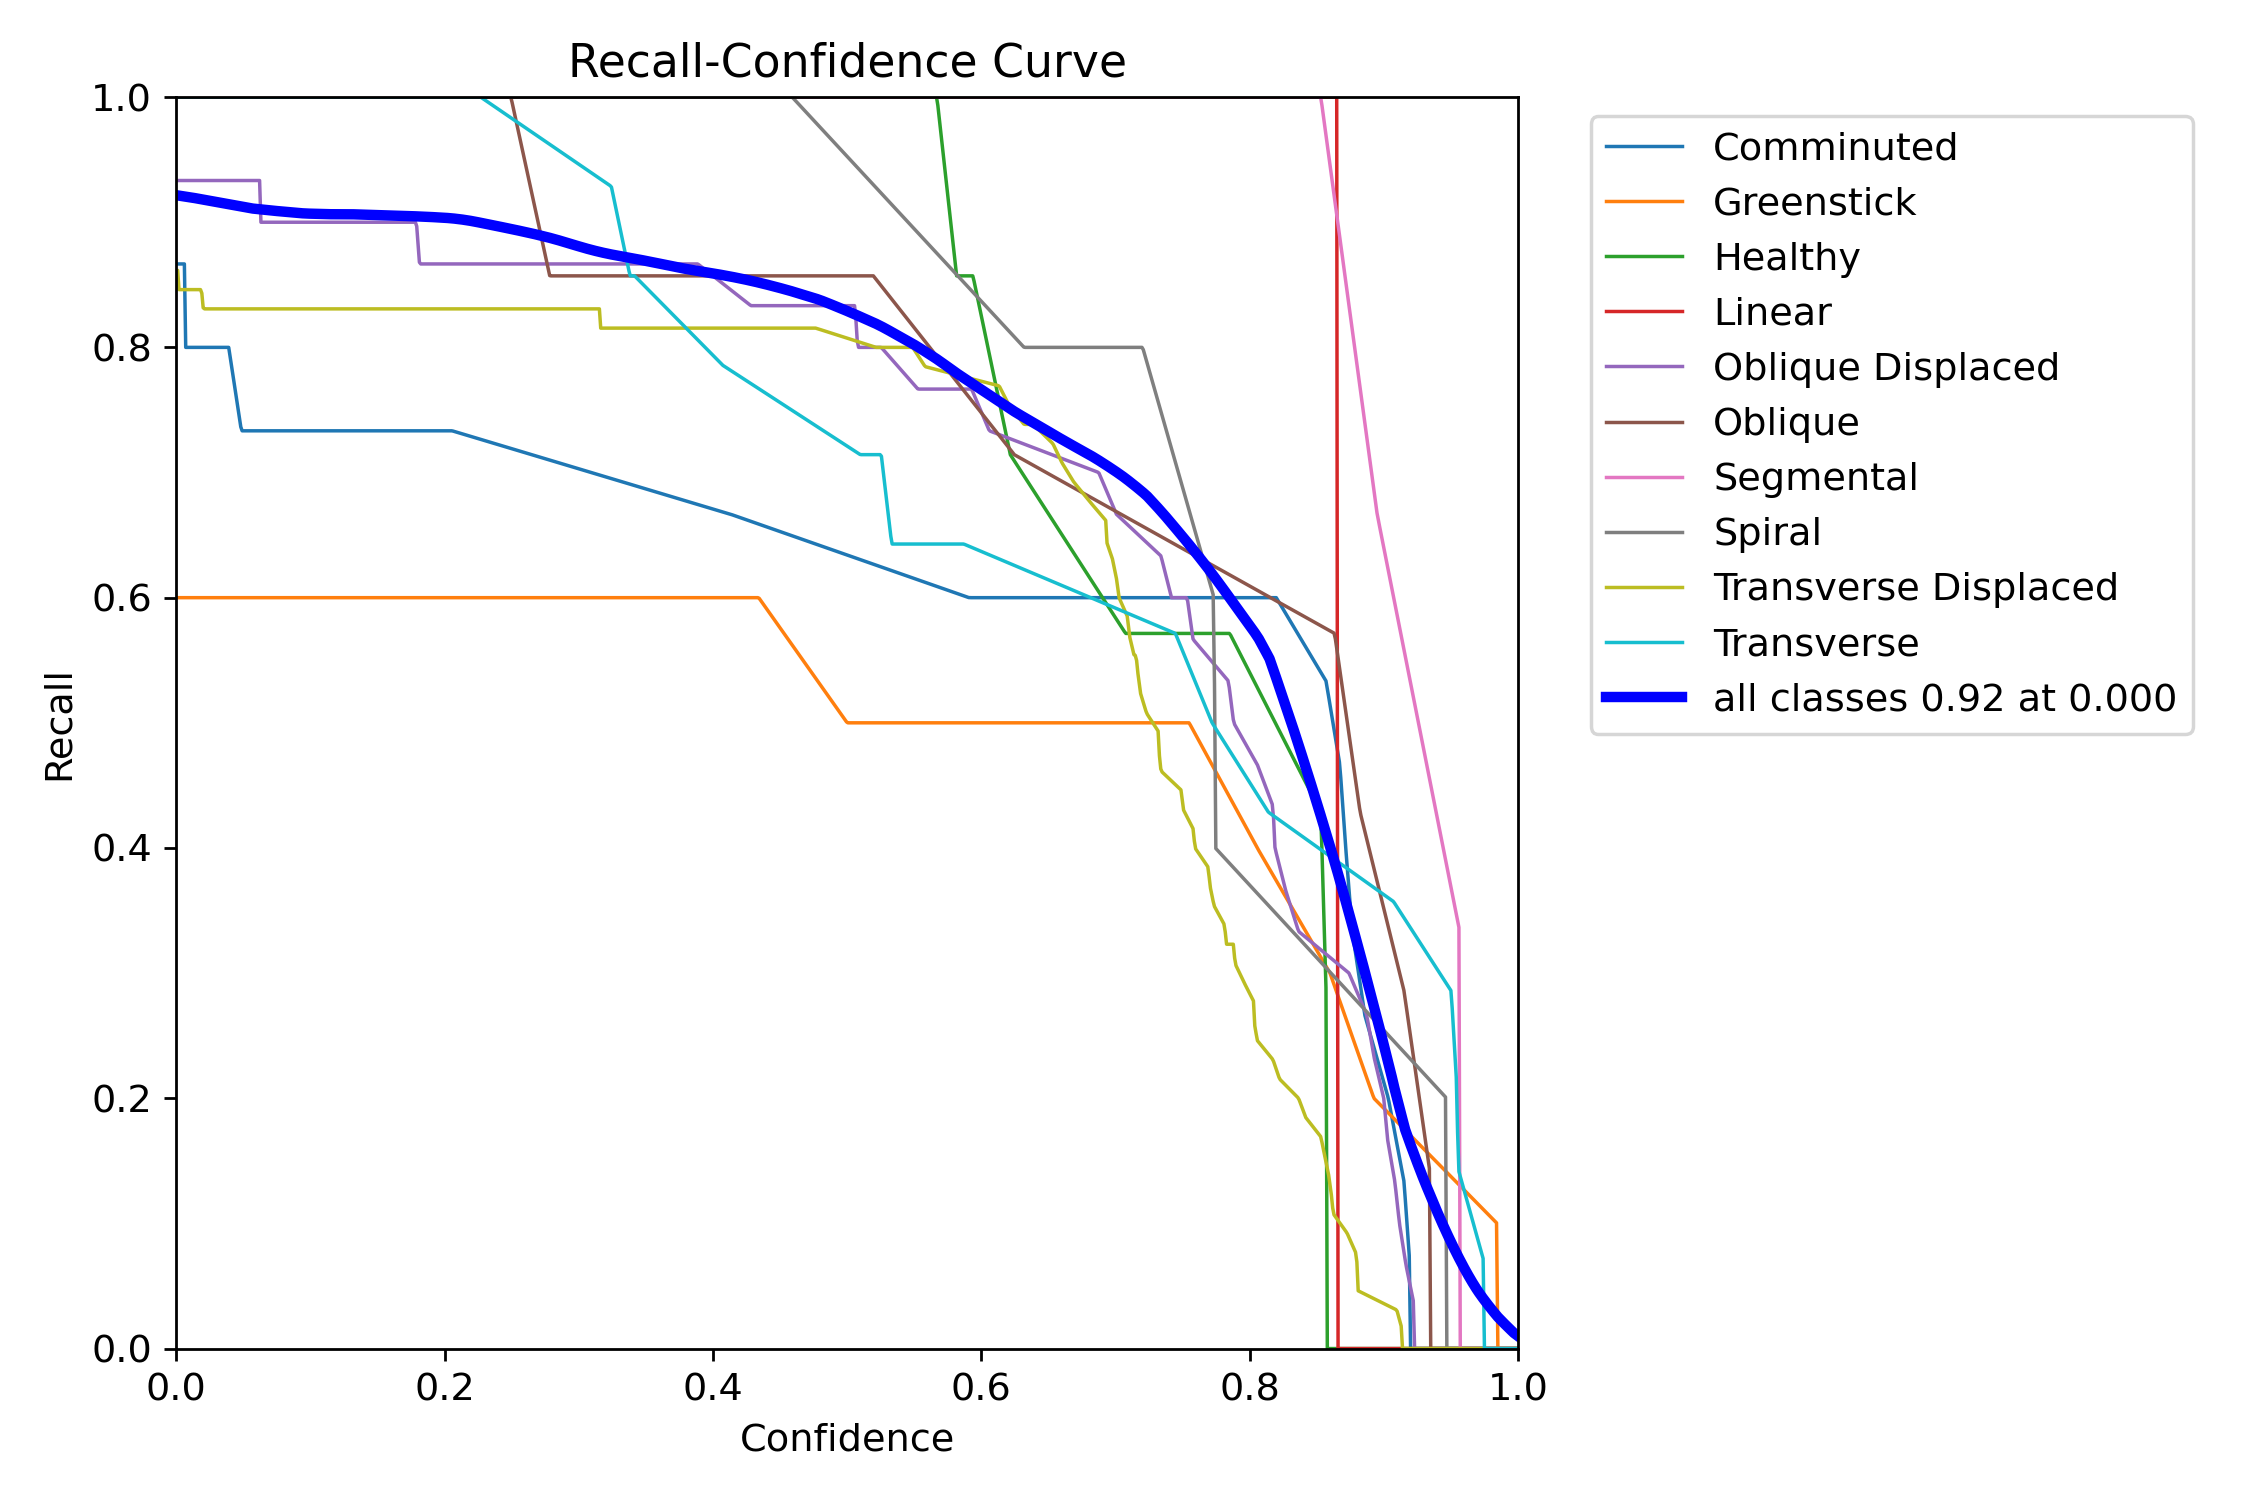

In [ ]:
display(Image(filename="/kaggle/working/runs/detect/train/R_curve.png", width=700))

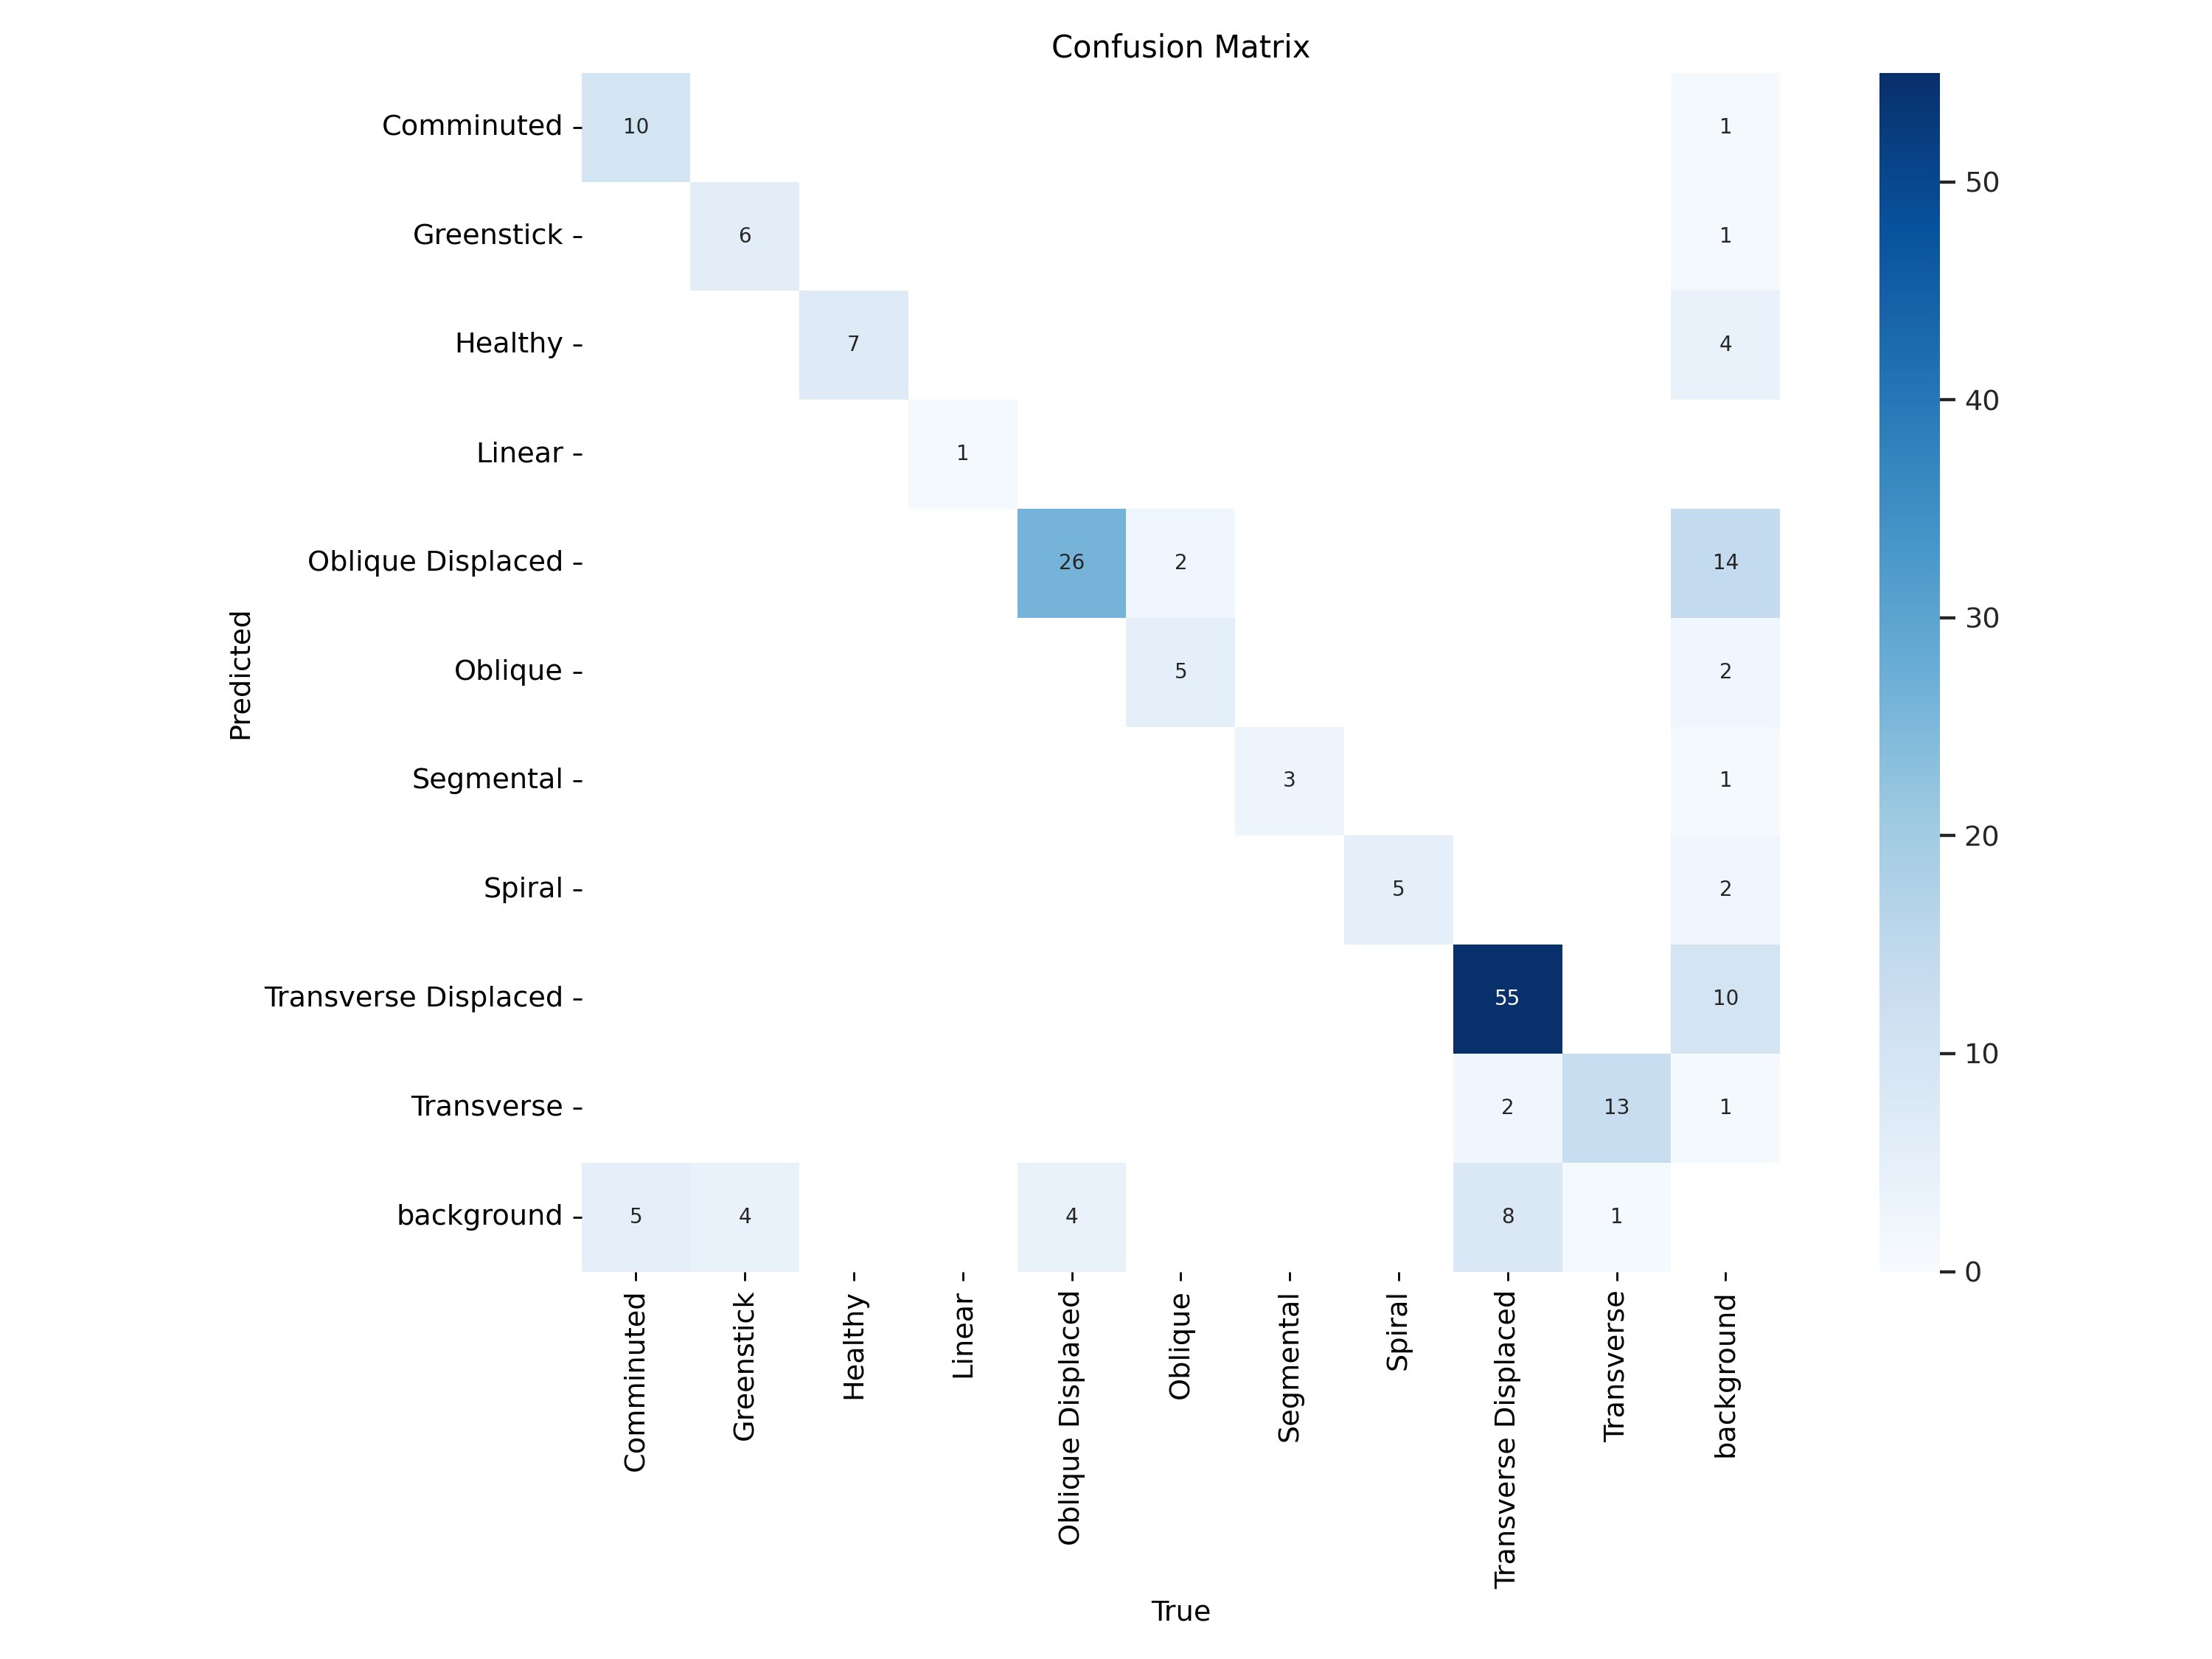

In [ ]:
display(Image(filename="/kaggle/working/runs/detect/train/confusion_matrix.png", width=700))

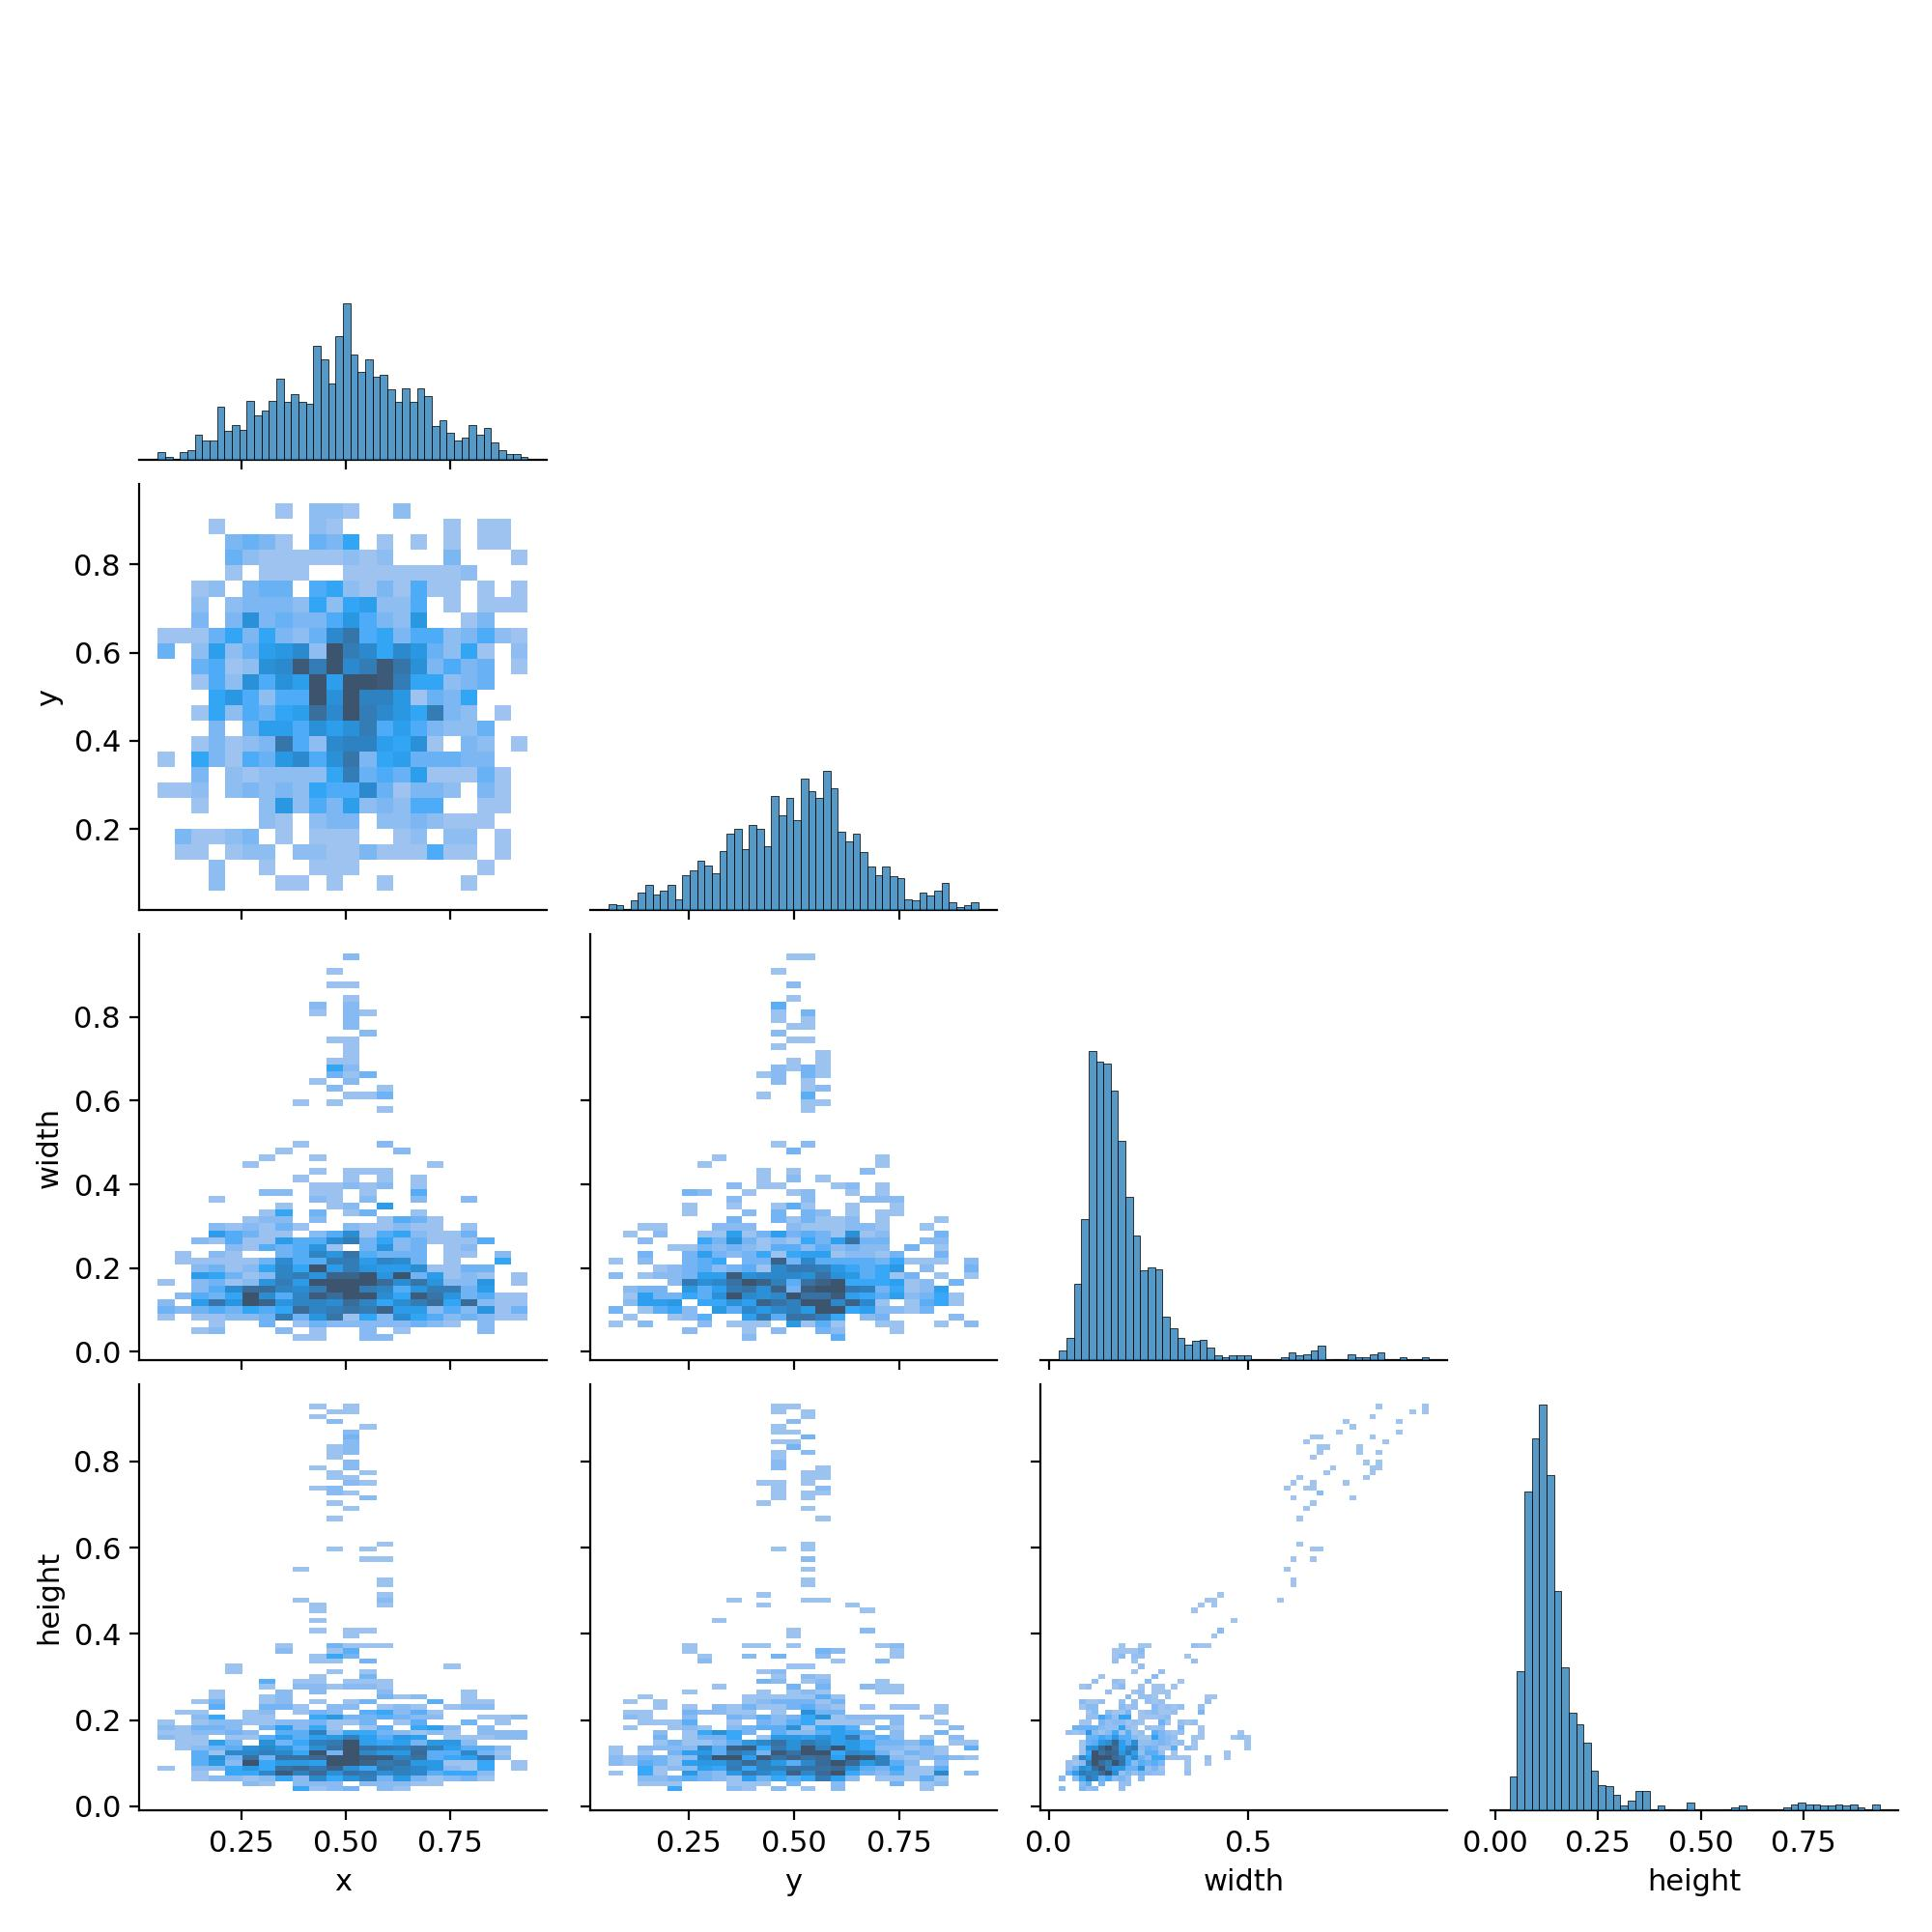

In [ ]:
display(Image(filename="/kaggle/working/runs/detect/train/labels_correlogram.jpg", width=700))

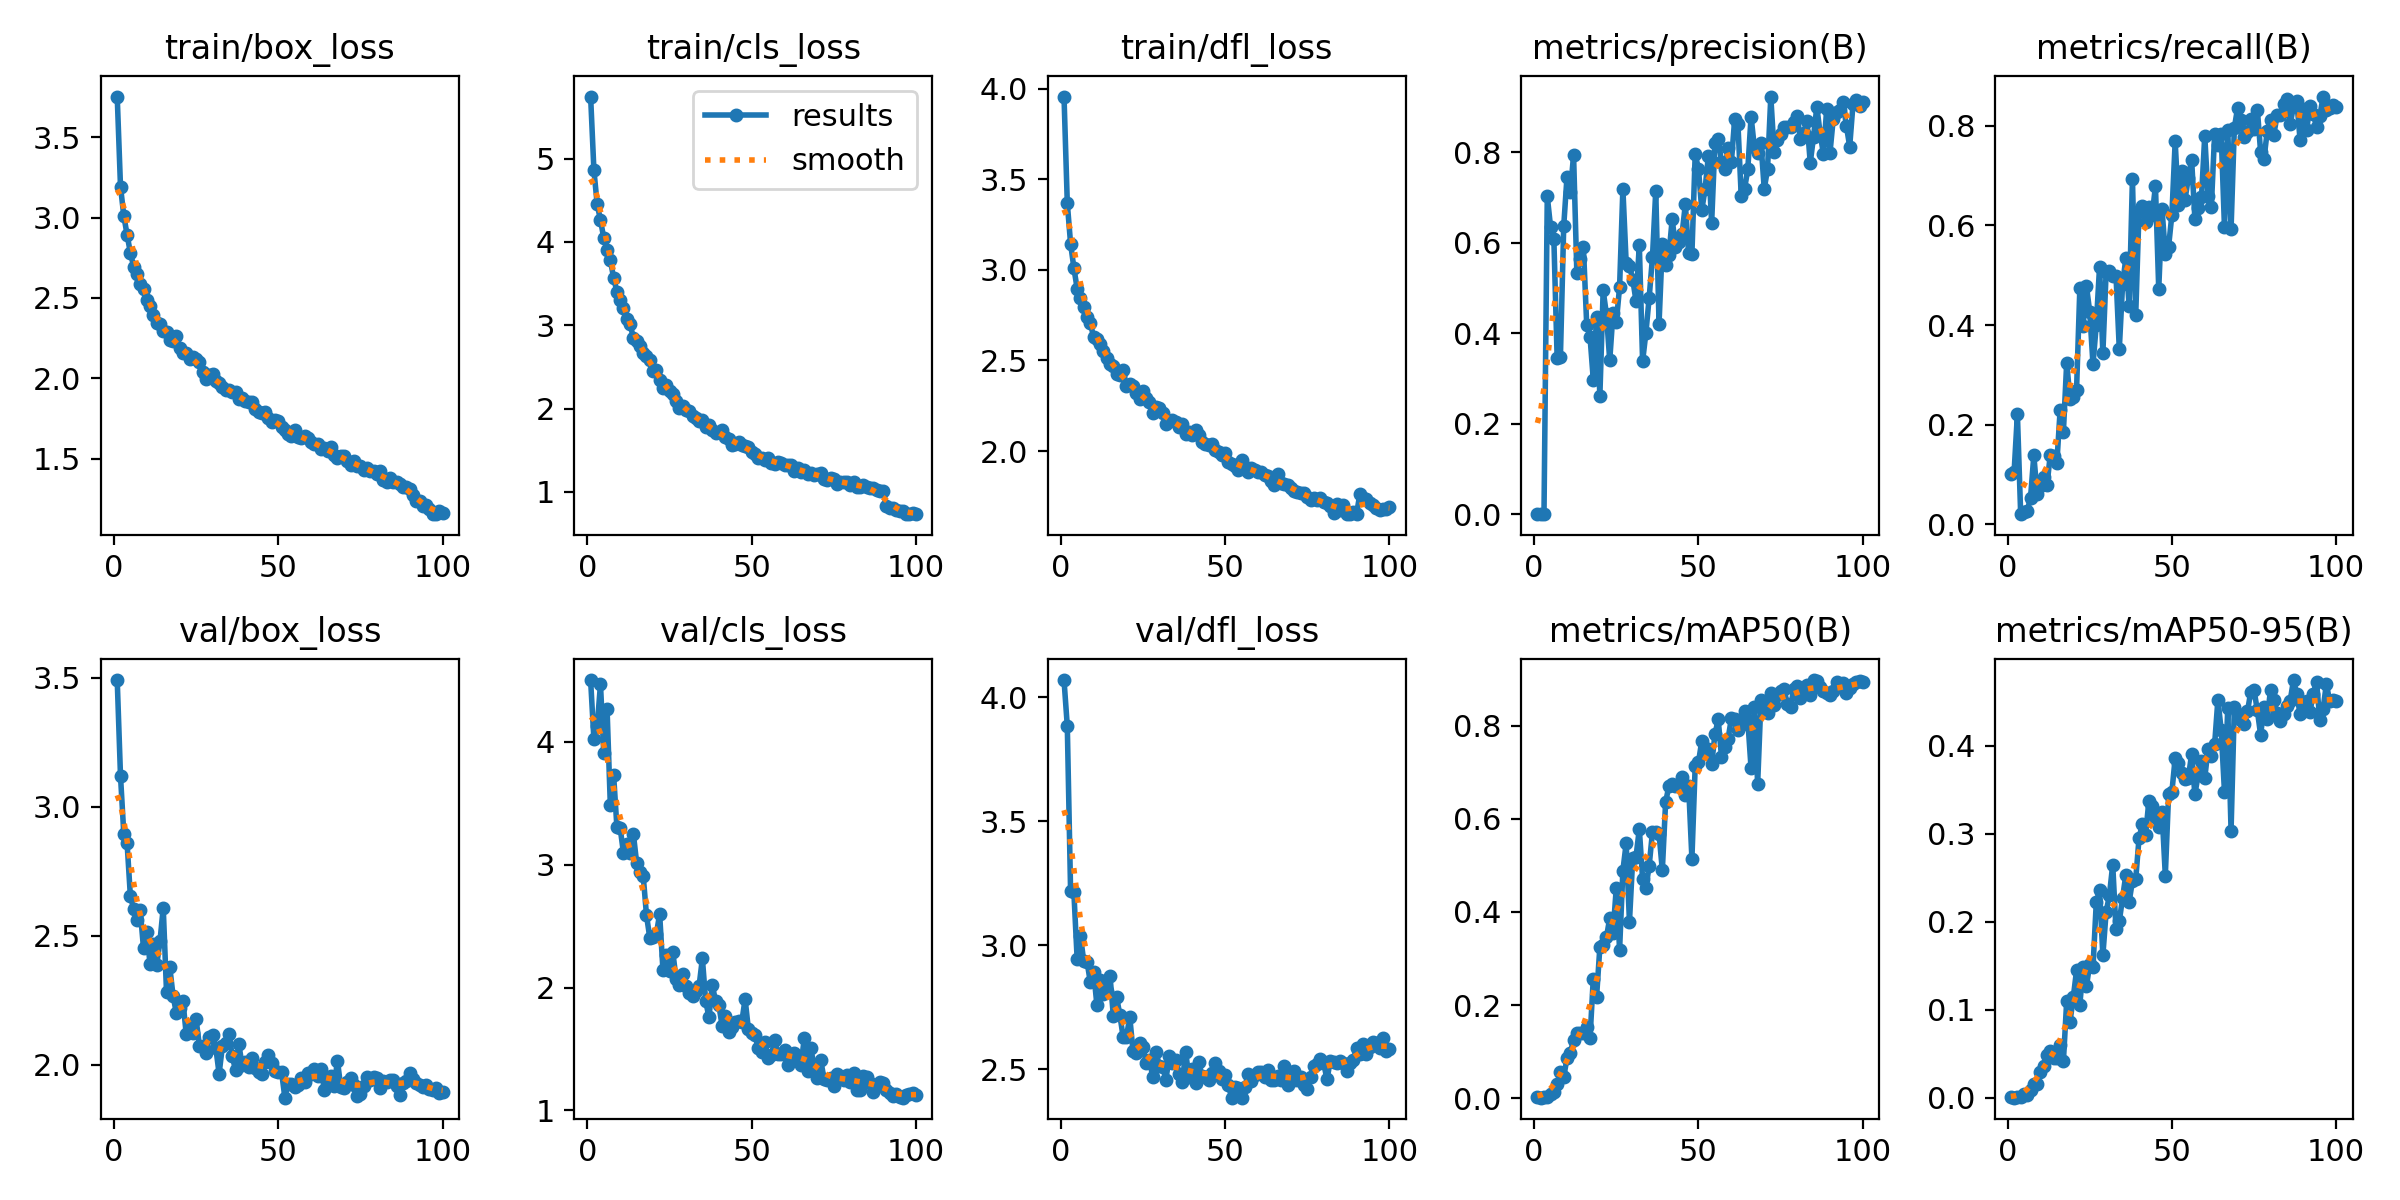

In [ ]:
display(Image(filename="/kaggle/working/runs/detect/train/results.png", width=700))

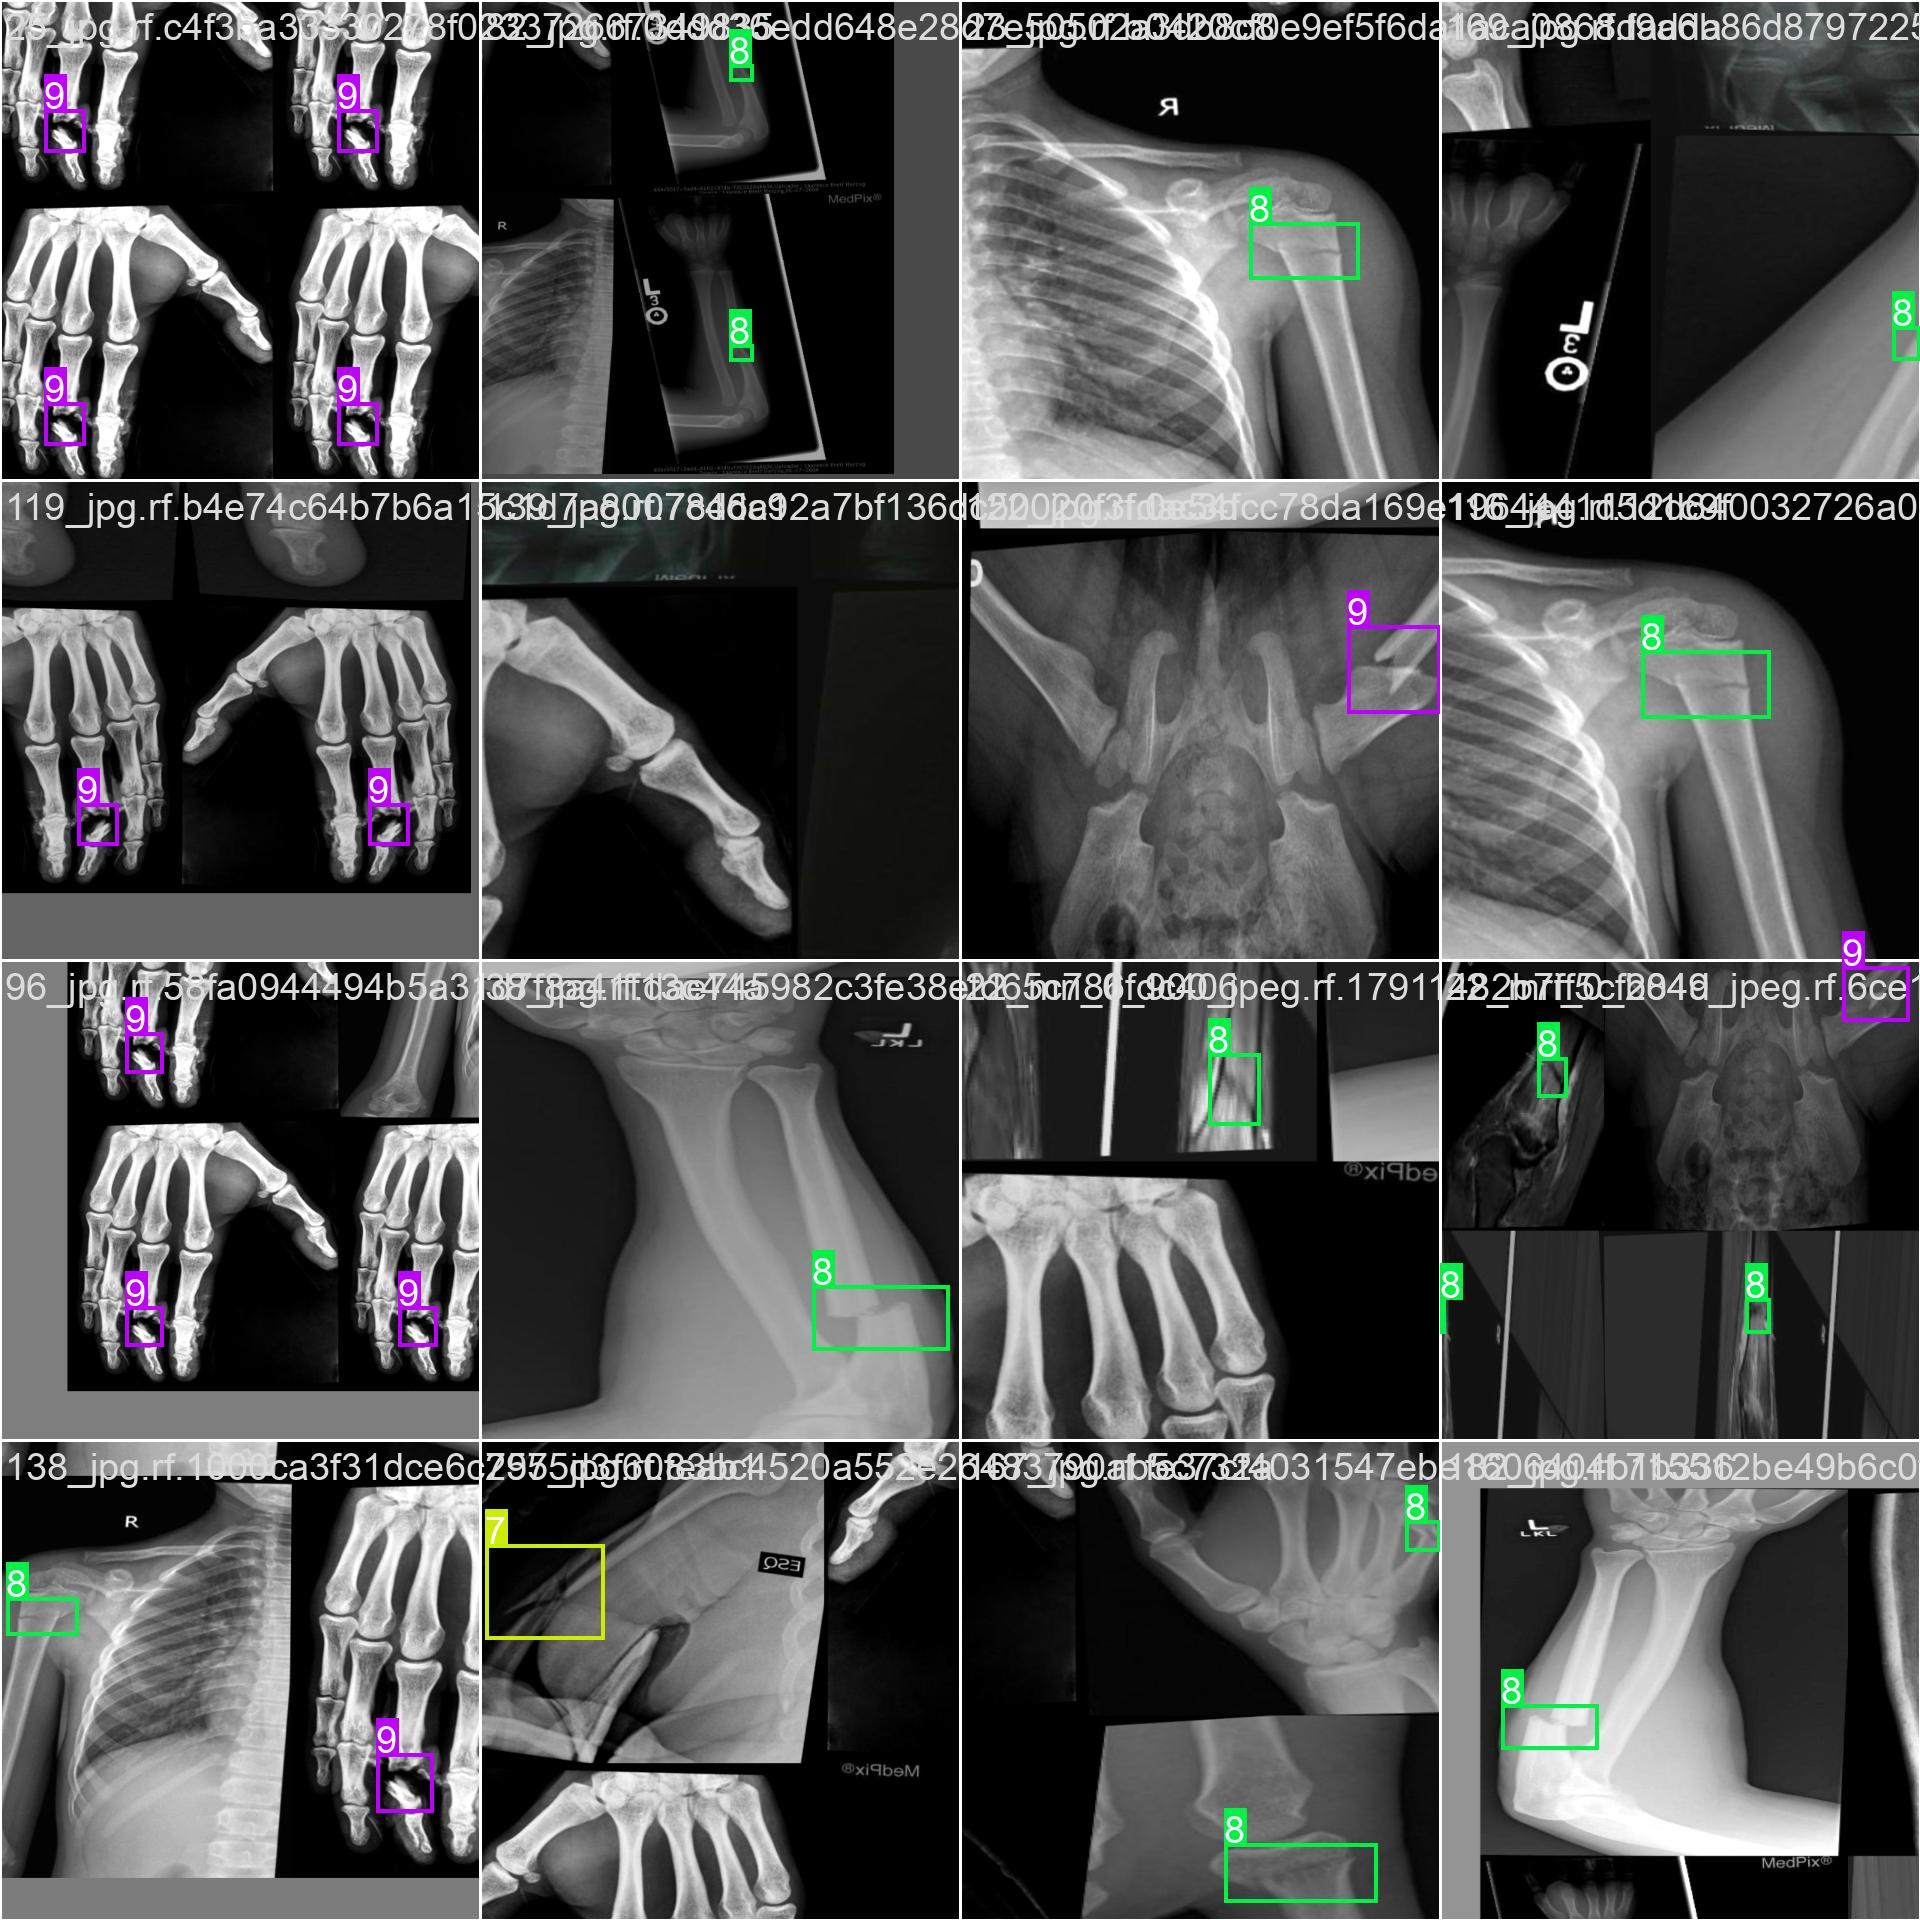

In [ ]:
display(Image(filename="/kaggle/working/runs/detect/train/train_batch0.jpg", width=700))

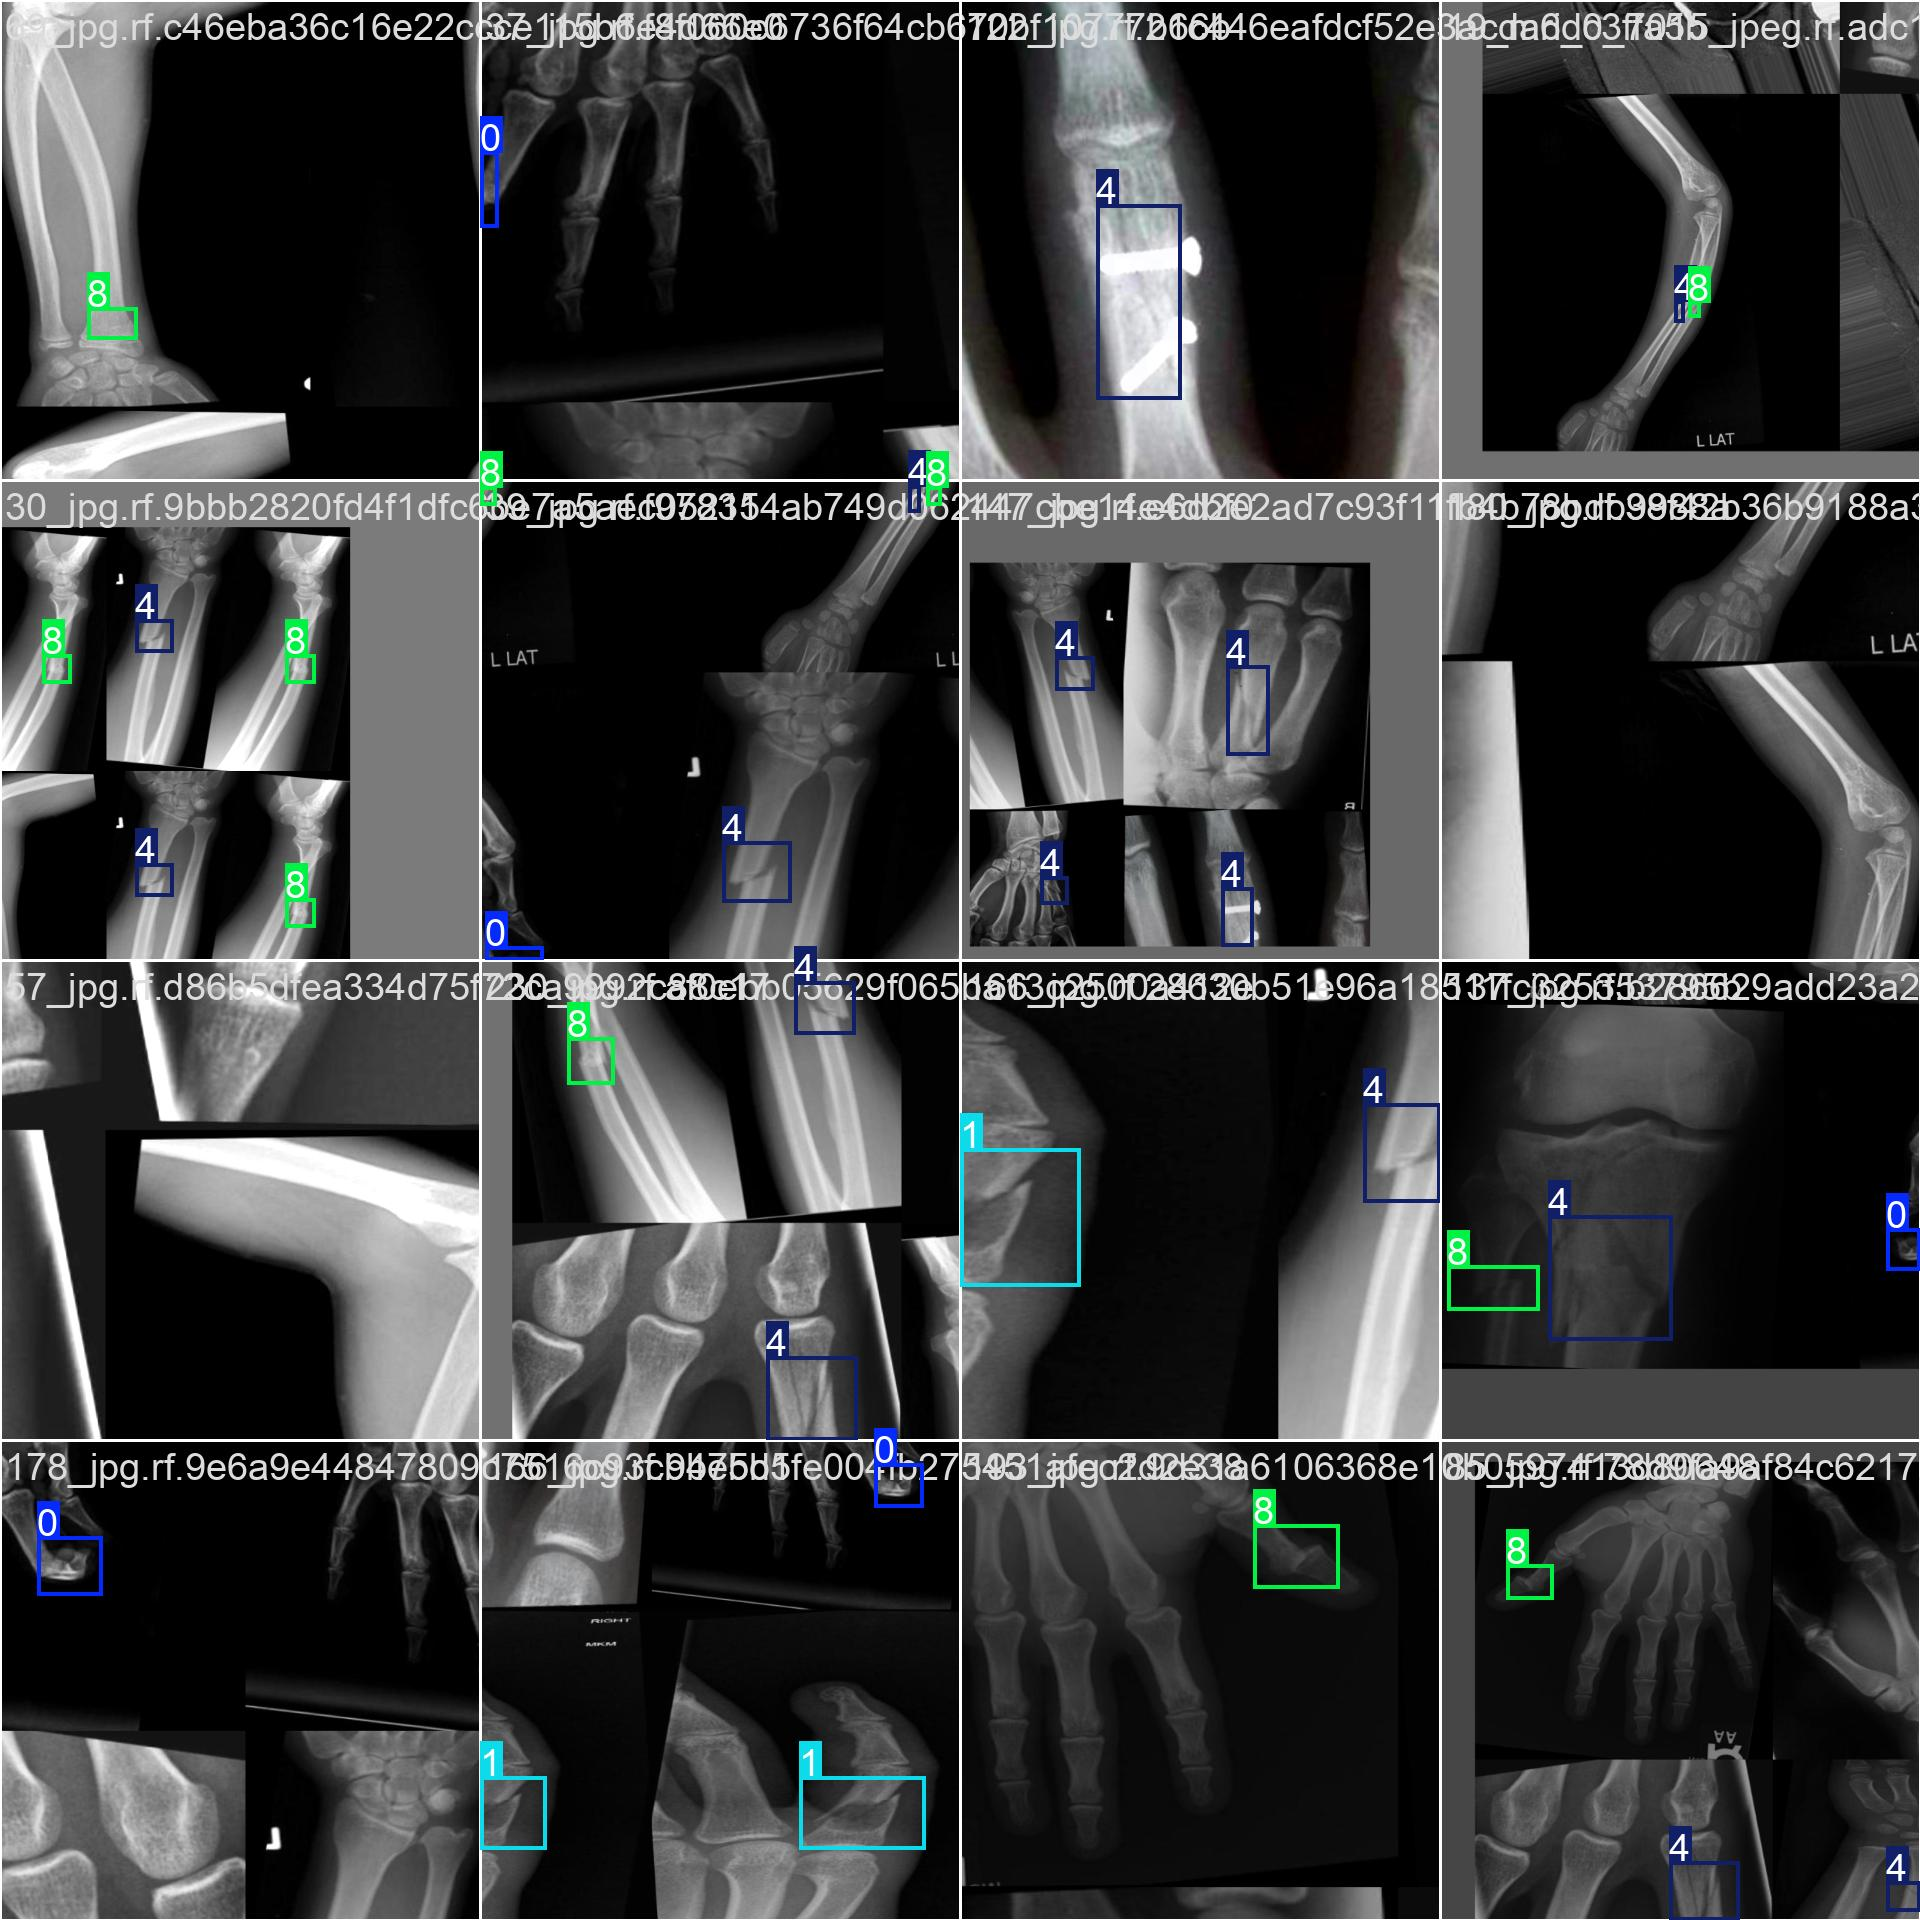

In [ ]:
display(Image(filename="/kaggle/working/runs/detect/train/train_batch1.jpg", width=700))

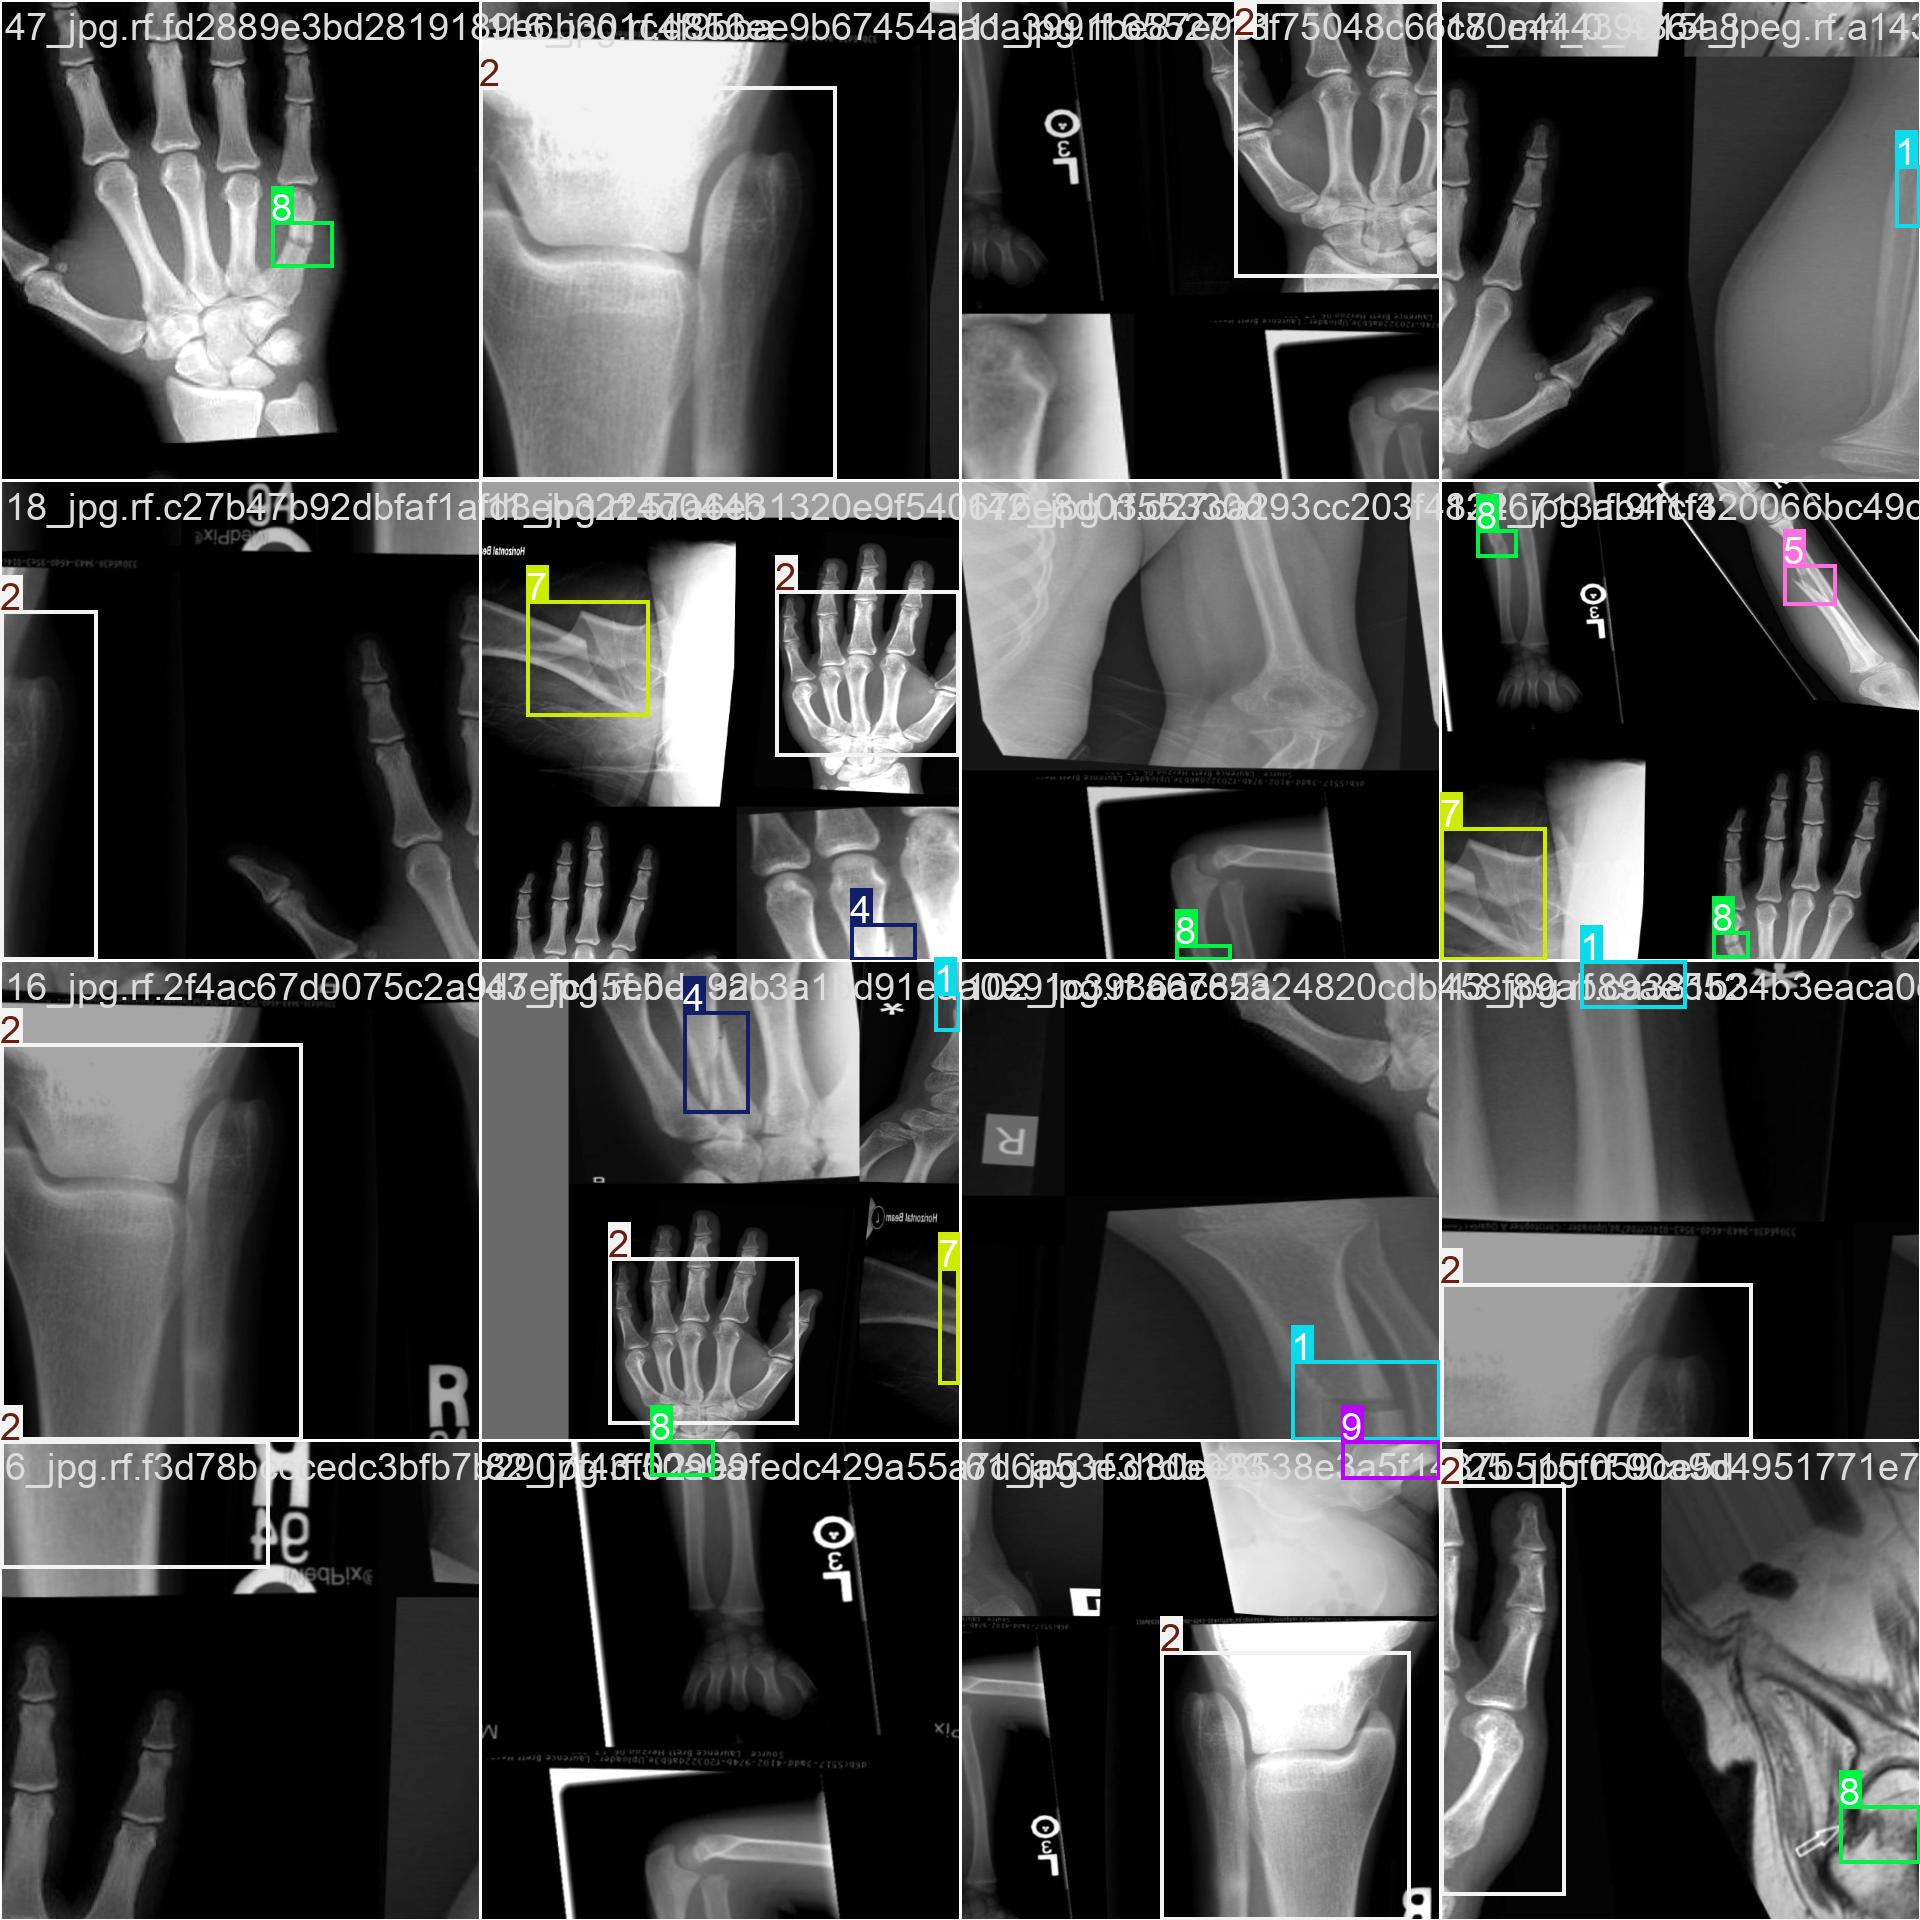

In [ ]:
display(Image(filename="/kaggle/working/runs/detect/train/train_batch2.jpg", width=700))

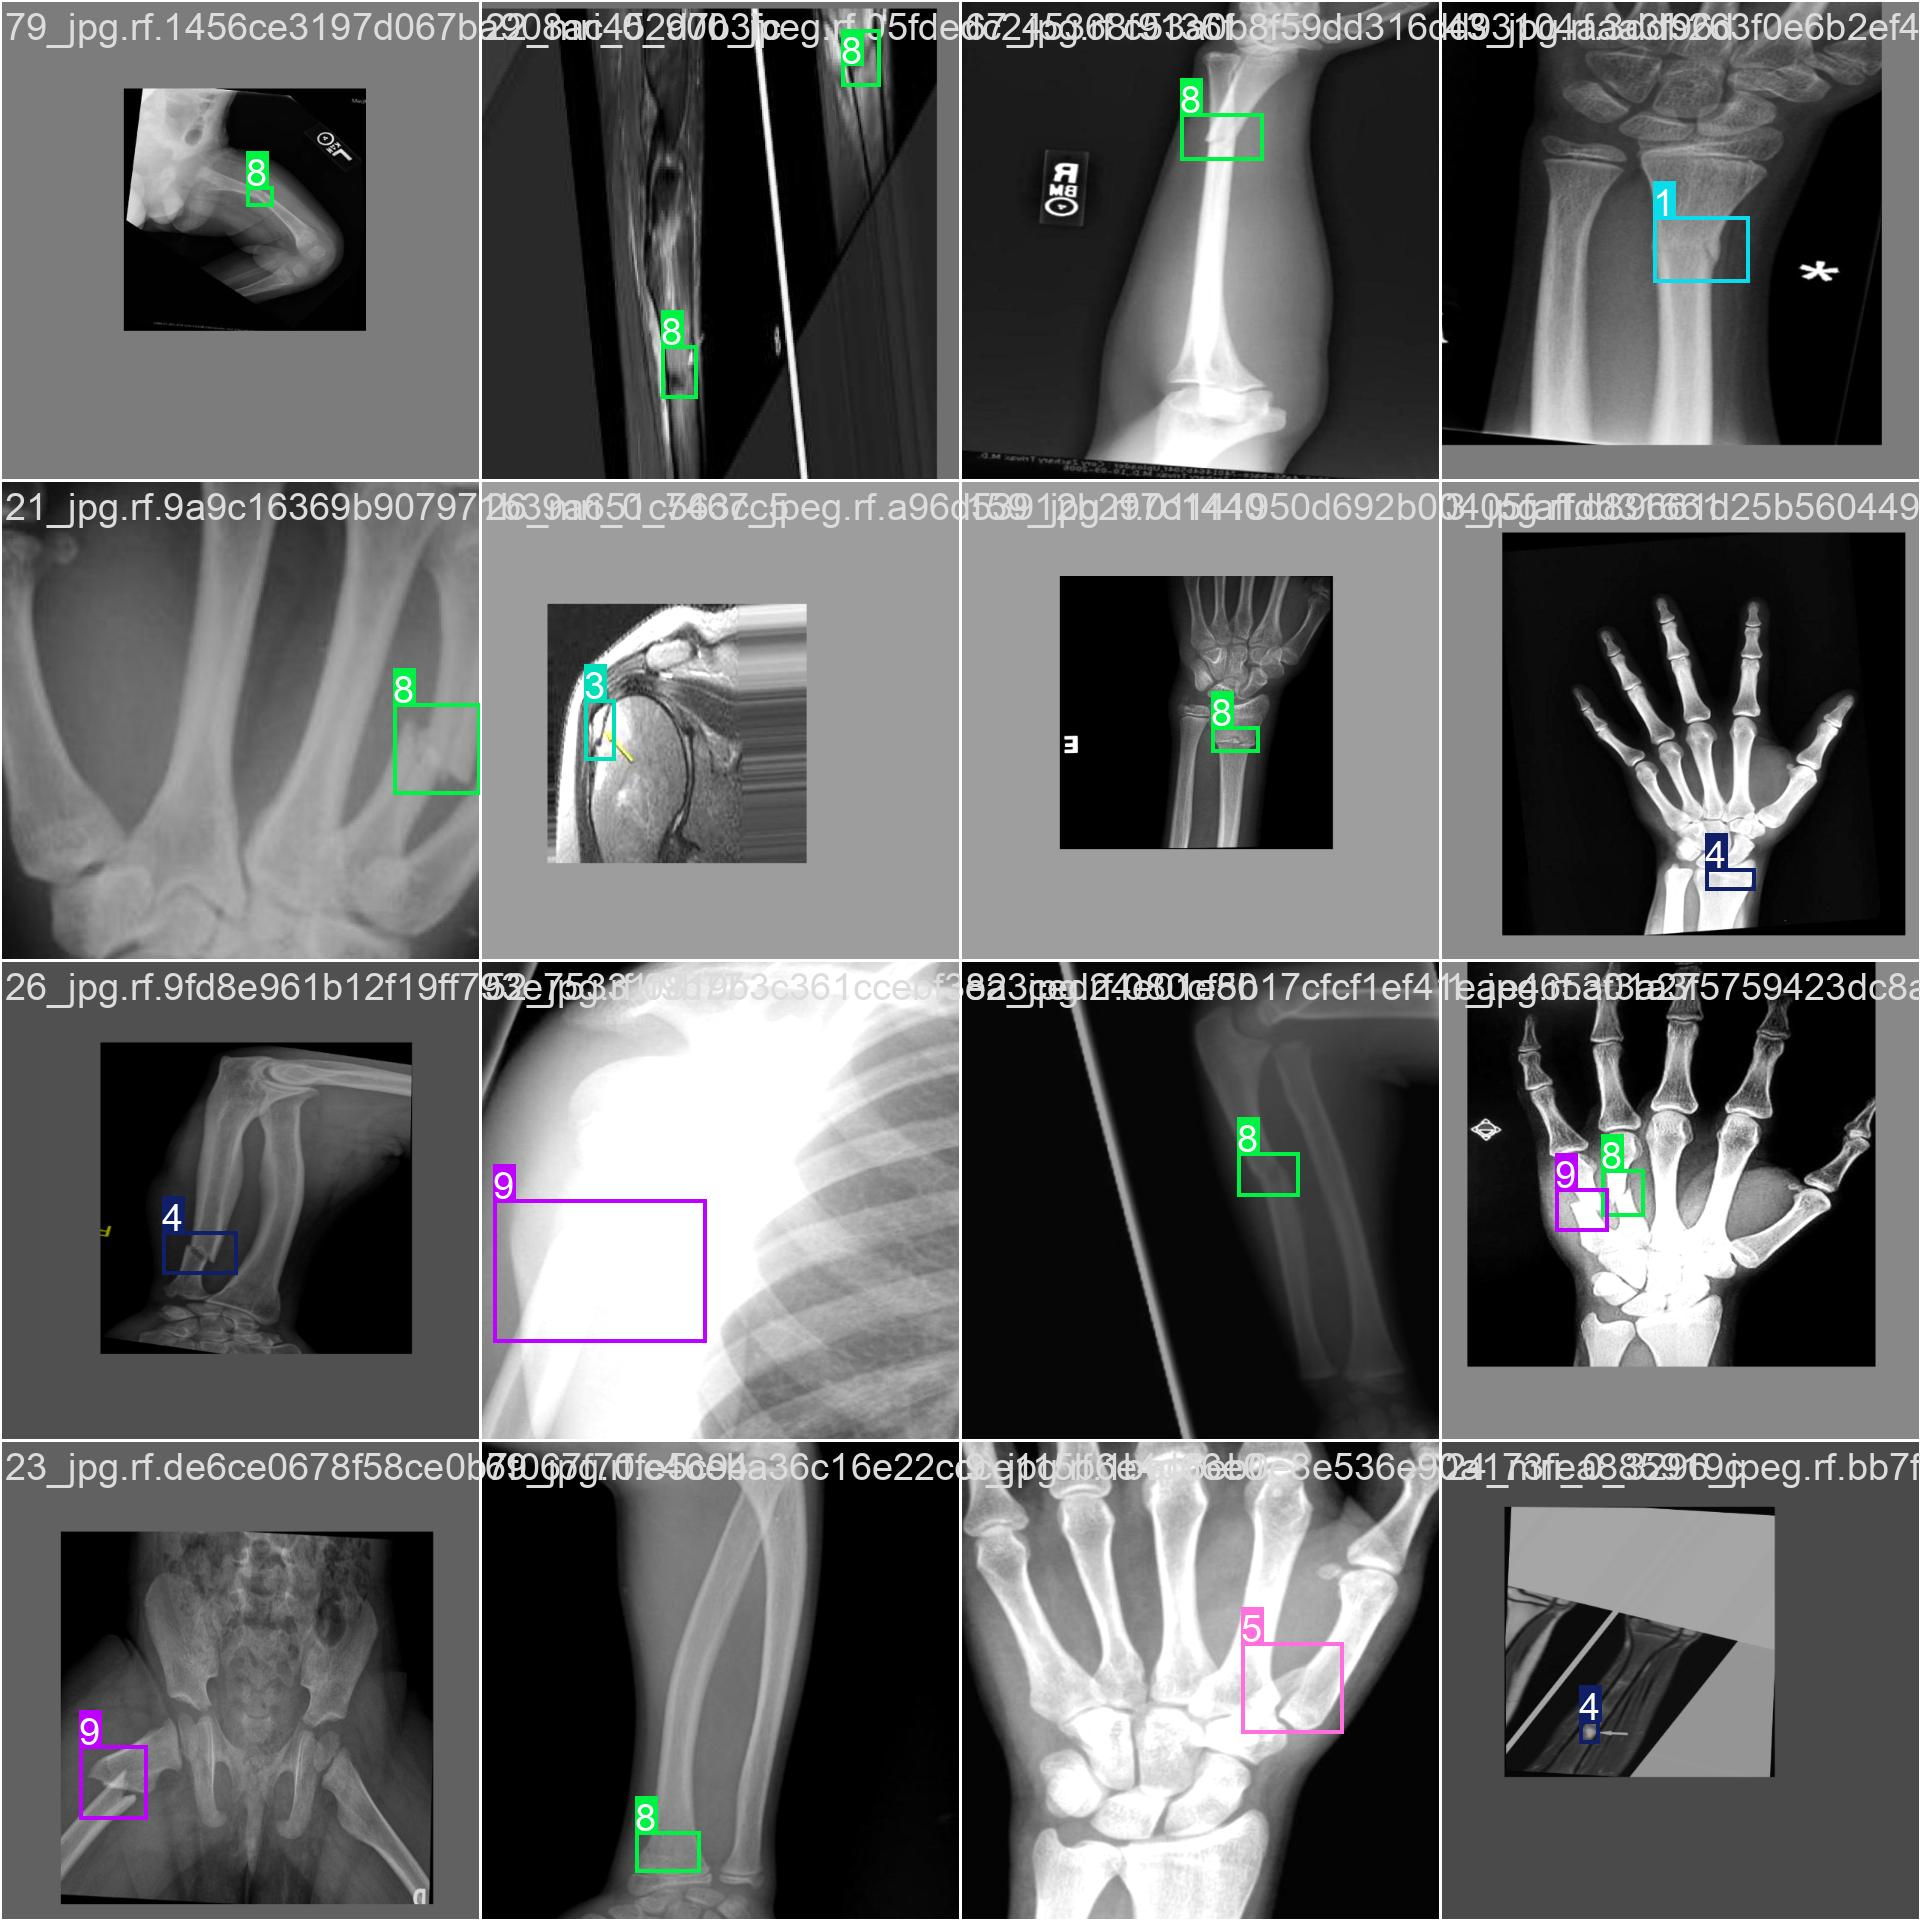

In [ ]:
display(Image(filename="/kaggle/working/runs/detect/train/train_batch7651.jpg", width=700))

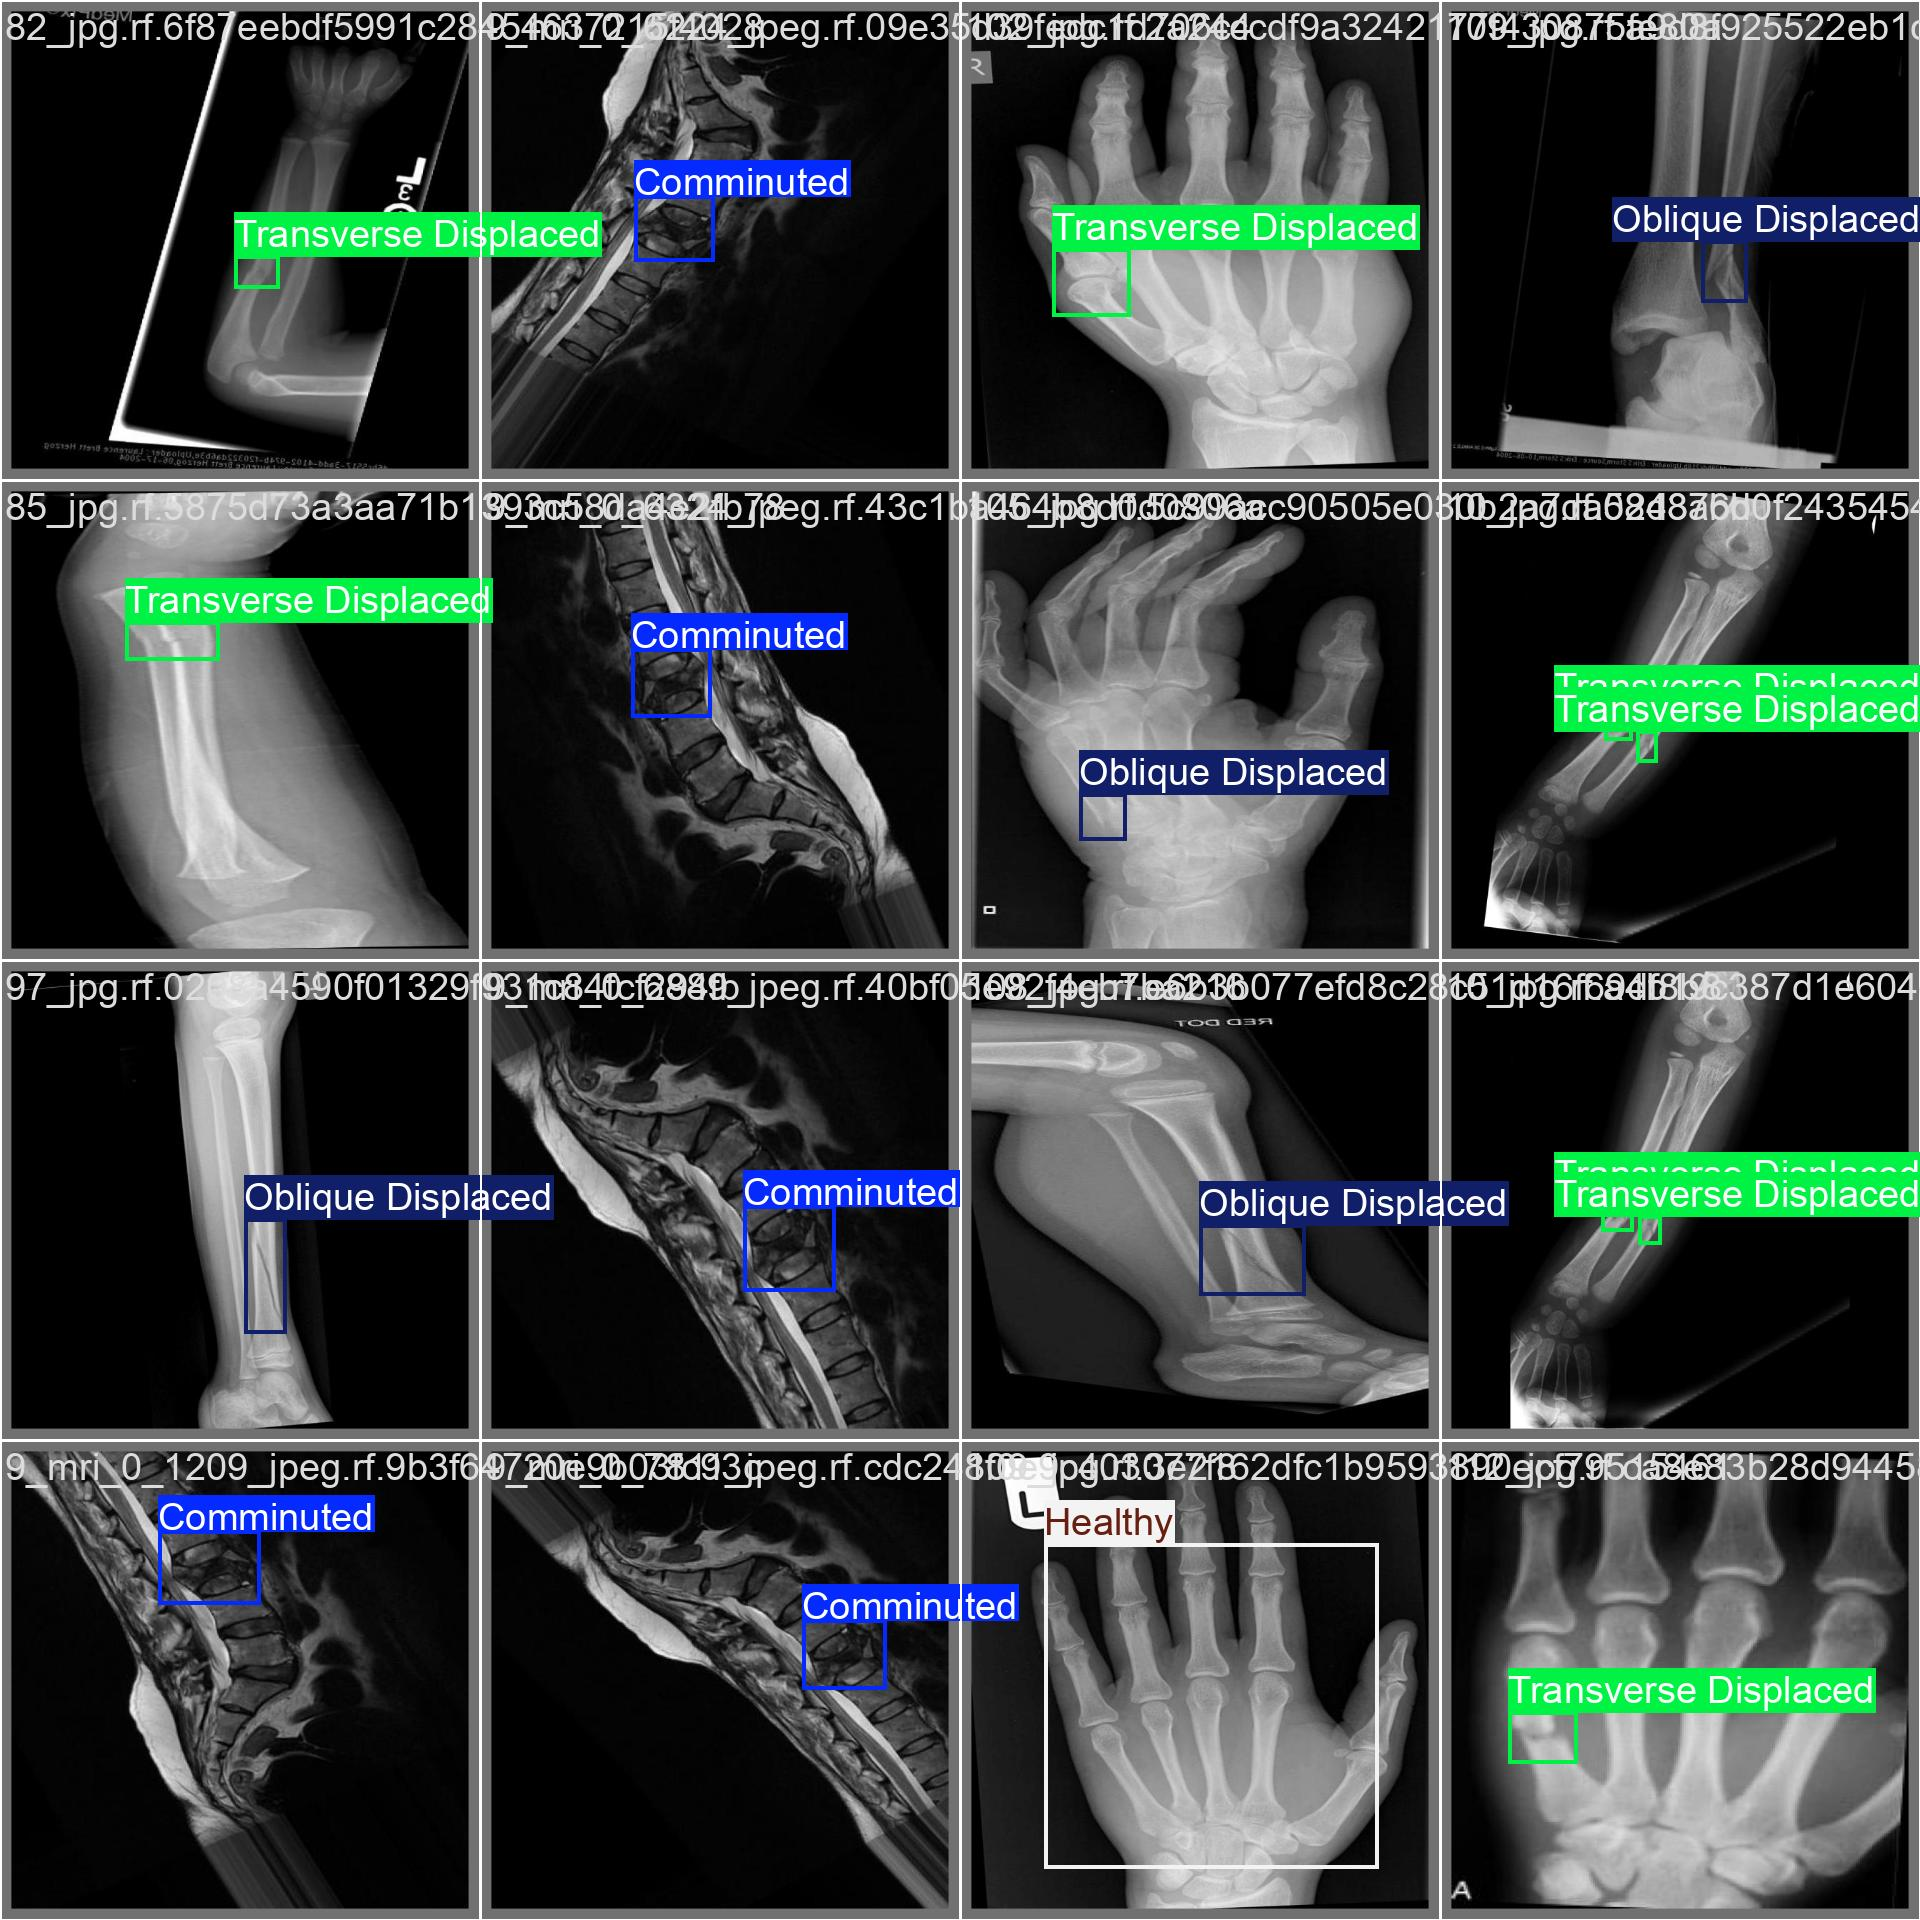

In [ ]:
display(Image(filename="/kaggle/working/runs/detect/train/val_batch0_labels.jpg", width=700))

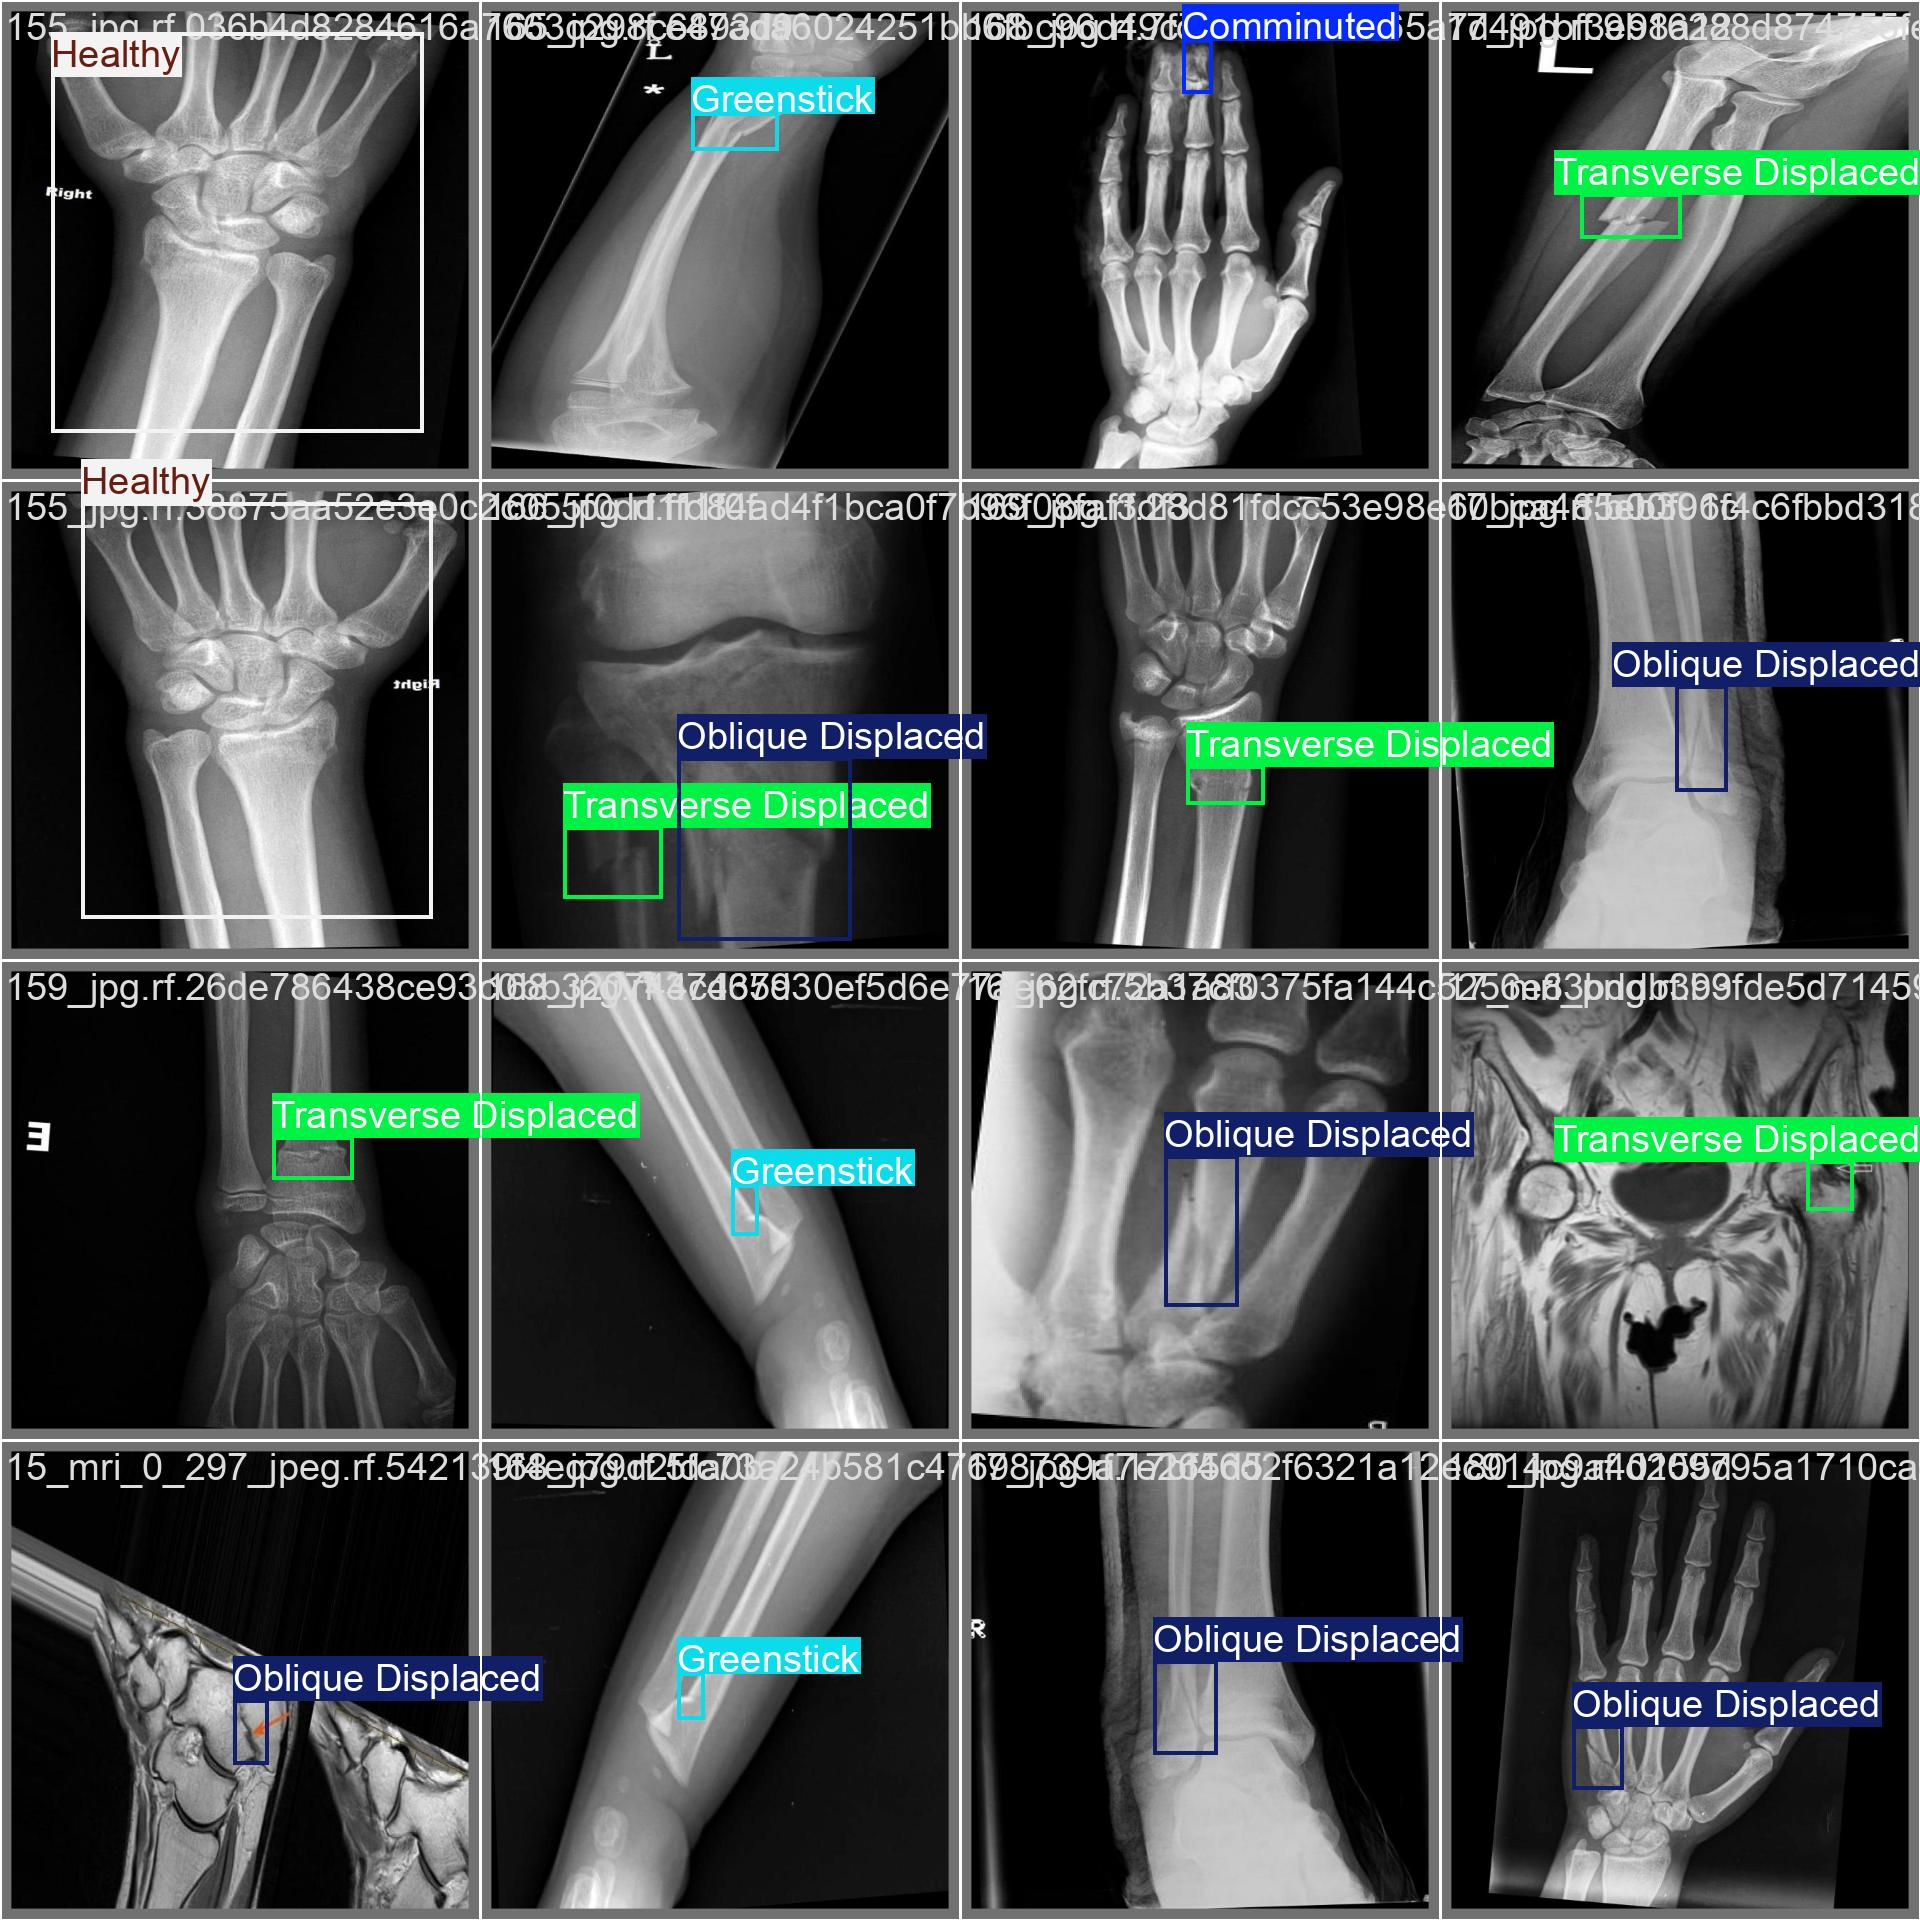

In [ ]:
display(Image(filename="/kaggle/working/runs/detect/train/val_batch1_labels.jpg", width=700))

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Best model load & prediction</h2>

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display

# Best model load
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

# Prediction
results = model.predict(source="/kaggle/input/human-bone-fractures-image-dataset-hbfmid/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images/126_jpg.rf.3d8c5097b435e82708ce7e8426d0766d.jpg", save=True, conf=0.25)


image 1/1 /kaggle/input/human-bone-fractures-image-dataset-hbfmid/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images/126_jpg.rf.3d8c5097b435e82708ce7e8426d0766d.jpg: 640x640 1 Oblique Displaced, 39.6ms
Speed: 1.8ms preprocess, 39.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


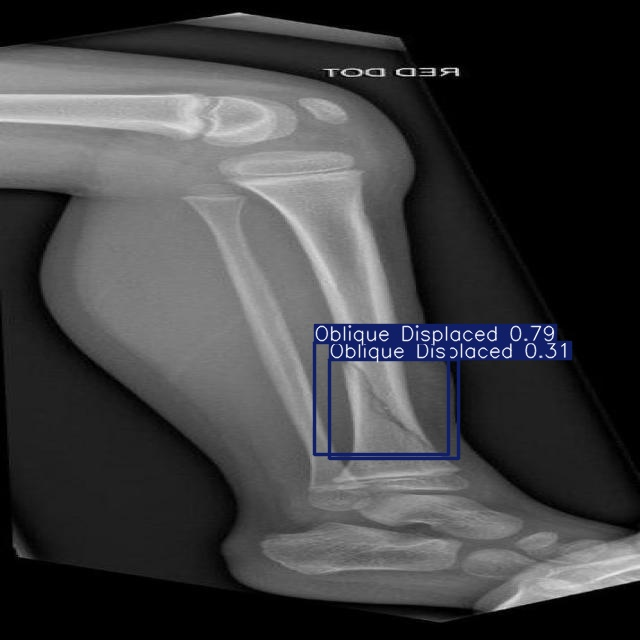

In [ ]:
# Display prediction
display(Image(filename='/kaggle/working/runs/detect/predict/108_jpg.rf.596cf88834b2ae2a65d1af826e75dff1.jpg'))

## prediction

In [ ]:
# Prediction
results = model.predict(source="/kaggle/input/human-bone-fractures-image-dataset-hbfmid/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images/20_mri_png.rf.ce256a8c0b408245bfff3106aea07c3c.jpg", save=True, conf=0.25)


image 1/1 /kaggle/input/human-bone-fractures-image-dataset-hbfmid/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images/20_mri_png.rf.ce256a8c0b408245bfff3106aea07c3c.jpg: 640x640 2 Transverse Displaceds, 39.4ms
Speed: 1.9ms preprocess, 39.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


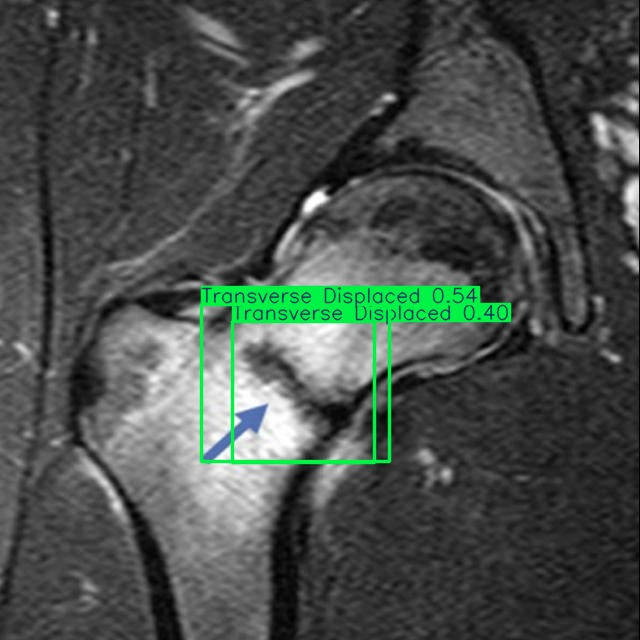

In [ ]:
# Display prediction manually
display(Image(filename='/kaggle/working/runs/detect/predict2/20_mri_png.rf.ce256a8c0b408245bfff3106aea07c3c.jpg'))

In [ ]:
# Prediction
results = model.predict(source="/kaggle/input/human-bone-fractures-image-dataset-hbfmid/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images/174_jpg.rf.56b997e984abf96322a3b2113266a768.jpg", save=True, conf=0.25)


image 1/1 /kaggle/input/human-bone-fractures-image-dataset-hbfmid/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images/174_jpg.rf.56b997e984abf96322a3b2113266a768.jpg: 640x640 1 Spiral, 39.8ms
Speed: 2.0ms preprocess, 39.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


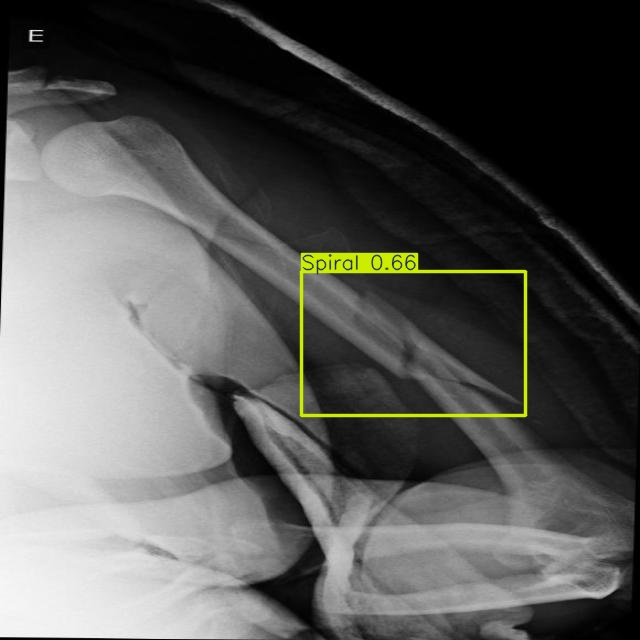

In [ ]:
# Display prediction manually
display(Image(filename='/kaggle/working/runs/detect/predict2/174_jpg.rf.56b997e984abf96322a3b2113266a768.jpg'))